# Limpieza de datos

In [1]:
import pandas as pd 
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [2]:
path_data_test = '/Users/arnoldoleyson/Desktop/Ironhack/Projects/statistical-analysis-project/house-prices-advanced-regression-techniques/train.csv'
path_description = '/Users/arnoldoleyson/Desktop/Ironhack/Projects/statistical-analysis-project/house-prices-advanced-regression-techniques/data_description.txt'

In [3]:
#Revisamos el archivo donde viene la descripción de que es cada columna en nuestro dataset
archivo = open (path_description, 'r')
descripcion = archivo.read()
print(descripcion)
archivo.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
data = pd.read_csv(path_data_test, encoding='latin-1')

In [5]:
#Le damos un vistazo a la información!!
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
#Revisamos la forma en la que está presentada la información en cuando a filas y columnas
data.shape

(1460, 81)

In [7]:
#Revisamos de manera general las columnas, la info que tienen, el tipo de info, etc
data.info()

#Nos damos cuenta que hay muchos datos nulos en algunas columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Revisamos el nombre de las columnas del dataframe
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#Quitamos cualquier posible espacio que estuviera adicional en el nombre de las columnas.
data.columns = data.columns.str.strip()
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#Renombramos las columnas que inician con un número
data = data.rename(columns = {'1stFlrSF': 'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF', '3SsnPorch': 'ThirdSsnPorch'})
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [11]:
#Revisamos que columnas tengo con data nula (sin datos)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
FirstFlrSF          0
SecondFlrSF         0
LowQualFin

In [12]:
#Hacemos una revisión para que nos traiga las columnas que tenemos con el número de datos nulos de cada una.
columnas_nulas = data.isnull().sum()
columnas_nulas[columnas_nulas > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
#Revisamos el índice de las columnas con mas de 200 datos nulos.

#Primero vemos la forma original de nuestro data frame
print(data.shape)

#Definimos la variable columnas_a_eliminar para eliminar las columnas_nulas que tenían más de 1,000 datos nulos. 
columnas_a_eliminar = columnas_nulas[columnas_nulas>200].index

#Actualizamos nuestra data con un data.drop y seleccionamos que se quiten las columnas_a_eliminar del paso previo
data = data.drop(columnas_a_eliminar, axis = 1)
print(data.shape)

(1460, 81)
(1460, 75)


In [14]:
#Nuevamente revisamos las columnas nulas
columnas_nulas = data.isnull().sum()
columnas_nulas[columnas_nulas > 0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [15]:
#Revisamos la columna de MasVnrType: Masonry veneer type
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [16]:
#Los valores nulos de la columna MasVnrType los cambiamos por None
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [17]:
#Los valores nulos de la columna MasVnrArea: Masonry veneer area in square feet, los cambiamos por 0, ya que no tienen MasVnrType
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [18]:
#Revisamos la columna de BsmtQual: Evaluates the height of the basement
data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [19]:
#Los valores nulos de la columna BsmtQual los cambiamos por NA, de que no tiene Basement
data['BsmtQual'] = data['BsmtQual'].fillna('NA')

In [20]:
#Revisamos la columna de BsmtCond: Evaluates the general condition of the basement
data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [21]:
#Los valores nulos de la columna BsmtCond los cambiamos por NA, de que no tiene Basement
data['BsmtCond'] = data['BsmtCond'].fillna('NA')

In [22]:
#Revisamos la columna de BsmtExposure: Refers to walkout or garden level walls
data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [23]:
#Los valores nulos de la columna BsmtExposure los cambiamos por NA, de que no tiene Basement
data['BsmtExposure'] = data['BsmtExposure'].fillna('NA')

In [24]:
#Revisamos la columna de BsmtFinType1: Rating of basement finished area
data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [25]:
#Los valores nulos de la columna BsmtFinType1 los cambiamos por NA, de que no tiene Basement
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('NA')

In [26]:
#Revisamos la columna de BsmtFinType2: Rating of basement finished area (if multiple types)
data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [27]:
#Los valores nulos de la columna BsmtFinType2 los cambiamos por NA, de que no tiene Basement
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('NA')

In [28]:
#Revisamos la columna de Electrical: Electrical system
data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [29]:
#El valor nulo de la columna Electrical los cambiamos por FuseA, que es el que normalmente se usa
data['Electrical'] = data['Electrical'].fillna('FuseA')

In [30]:
#Para los datos nulos del Garage, revisamos si las 5 columnas con datos nulos se encuentran en las mismas filas
data[data['GarageType'].isnull() & data['GarageYrBlt'].isnull() & data['GarageFinish'].isnull() & data['GarageQual'].isnull() & data['GarageCond'].isnull()]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
39      40          90       RL     6040   Pave      Reg         Lvl   
48      49         190       RM     4456   Pave      Reg         Lvl   
78      79          90       RL    10778   Pave      Reg         Lvl   
88      89          50        C     8470   Pave      IR1         Lvl   
89      90          20       RL     8070   Pave      Reg         Lvl   
99     100          20       RL     9320   Pave      IR1         Lvl   
108    109          50       RM     8500   Pave      Reg         Lvl   
125    126         190       RM     6780   Pave      Reg         Lvl   
127    128          45       RM     4388   Pave      IR1         Bnk   
140    141          20       RL    10500   Pave      Reg         Lvl   
148    149          20       RL     7500   Pave      Reg         Lvl   
155    156          50       RL     9600   Pave      Reg         Lvl   
163    164          45       RL     5500   Pave      Reg         Lvl   
165    166         190       RL    10106   Pave      Reg         Lvl   
198    199          75       RM     5520   Pave      Reg         Lvl   
210    211          30       RL     5604   Pave      Reg         Lvl   
241    242          30       RM     3880   Pave      Reg         Lvl   
250    251          30       RL     5350   Pave      IR1         Lvl   
287    288          20       RL     8125   Pave      IR1         Lvl   
291    292         190       RL     5687   Pave      Reg         Bnk   
307    308          50       RM     7920   Pave      IR1         Lvl   
375    376          30       RL    10020   Pave      IR1         Low   
386    387          50       RL     8410   Pave      Reg         Lvl   
393    394          30       RL     7446   Pave      Reg         Lvl   
431    432          50       RM     5586   Pave      IR1         Bnk   
434    435         180       RM     1890   Pave      Reg         Lvl   
441    442          90       RL    12108   Pave      Reg         Lvl   
464    465          20       RL     8430   Pave      Reg         HLS   
495    496          30        C     7879   Pave      Reg         Lvl   
520    521         190       RL    10800   Pave      Reg         Lvl   
528    529          30       RL     9098   Pave      IR1         Lvl   
533    534          20       RL     5000   Pave      Reg         Low   
535    536         190       RL     7000   Pave      Reg         Lvl   
562    563          30       RL    13907   Pave      Reg         Lvl   
582    583          90       RL    11841   Grvl      Reg         Lvl   
613    614          20       RL     8402   Pave      Reg         Lvl   
614    615         180       RM     1491   Pave      Reg         Lvl   
620    621          30       RL     8248   Pave      Reg         Lvl   
635    636         190       RH    10896   Pave      Reg         Bnk   
636    637          30       RM     6120   Pave      Reg         Lvl   
638    639          30       RL     8777   Pave      Reg         Lvl   
649    650         180       RM     1936   Pave      Reg         Lvl   
705    706         190       RM     5600   Pave      Reg         Lvl   
710    711          30       RL     4130   Pave      IR1         Lvl   
738    739          90       RL    10800   Pave      Reg         Lvl   
750    751          50       RM     8800   Pave      Reg         Lvl   
784    785          75       RM     6300   Pave      Reg         Lvl   
826    827          45       RM     6130   Pave      Reg         Lvl   
843    844          90       RL     8000   Pave      Reg         Lvl   
921    922          90       RL     8777   Pave      Reg         Lvl   
942    943          90       RL     7711   Pave      IR1         Lvl   
954    955          90       RL     9400   Pave      IR1         Lvl   
960    961          20       RL     7207   Pave      IR1         Lvl   
968    969          50       RM     5925   Pave      Reg         Lvl   
970    971          50       RL    10800   Pave 

In [31]:
#Vemos que son 81 filas, igual que los datos nulos de cada columna, por lo que a todas las trataremos como que no tienen garage
data['GarageType'] = data['GarageType'].fillna('NA')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('NA')
data['GarageFinish'] = data['GarageFinish'].fillna('NA')
data['GarageQual'] = data['GarageQual'].fillna('NA')
data['GarageCond'] = data['GarageCond'].fillna('NA')

In [32]:
#Nuevamente revisamos las columnas nulas, y no debieramos tener ninguna con datos nulos
columnas_nulas = data.isnull().sum()
columnas_nulas[columnas_nulas > 0]

Series([], dtype: int64)

In [33]:
#Le damos un vistazo a la información
data.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  FirstFlrSF  SecondFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr         856          854             0       1710   
1          Y      SBrkr        1262            0             0       1262   
2          Y      SBrkr         920          866             0       1786   
3          Y      SBrkr         961          756             0       1717   
4          Y      SBrkr        1145         1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageYrBlt  \
0          Gd             8        Typ           0     Attchd        2003   
1          TA             6        Typ           1     Attchd        1976   
2          Gd             6        Typ           1     Attchd        2001   
3          Gd             7        Typ           1 

In [34]:
#Revisamos si hay algunos registros duplicados, para eliminarlos

print(len(data))

data = data.drop_duplicates()

print(len(data))

1460
1460


#Cambiaremos la información de variables categóricas a numéricas, para poder analizarla.

In [35]:
#Vemos la información de las columnas para ver cuales necesitan la conversión
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [36]:
#Realizamos el cambio de las variables categóricas a valores numéricos

ord_enc = OrdinalEncoder()

data["MSZoning_code"] = ord_enc.fit_transform(data[["MSZoning"]])
data["Street_code"] = ord_enc.fit_transform(data[["Street"]])
data["LotShape_code"] = ord_enc.fit_transform(data[["LotShape"]])
data["LandContour_code"] = ord_enc.fit_transform(data[["LandContour"]])
data["Utilities_code"] = ord_enc.fit_transform(data[["Utilities"]])
data["LotConfig_code"] = ord_enc.fit_transform(data[["LotConfig"]])
data["LandSlope_code"] = ord_enc.fit_transform(data[["LandSlope"]])
data["Neighborhood_code"] = ord_enc.fit_transform(data[["Neighborhood"]])
data["Condition1_code"] = ord_enc.fit_transform(data[["Condition1"]])
data["Condition2_code"] = ord_enc.fit_transform(data[["Condition2"]])
data["BldgType_code"] = ord_enc.fit_transform(data[["BldgType"]])
data["HouseStyle_code"] = ord_enc.fit_transform(data[["HouseStyle"]])
data["RoofStyle_code"] = ord_enc.fit_transform(data[["RoofStyle"]])
data["RoofMatl_code"] = ord_enc.fit_transform(data[["RoofMatl"]])
data["Exterior1st_code"] = ord_enc.fit_transform(data[["Exterior1st"]])
data["Exterior2nd_code"] = ord_enc.fit_transform(data[["Exterior2nd"]])
data["MasVnrType_code"] = ord_enc.fit_transform(data[["MasVnrType"]])
data["ExterQual_code"] = ord_enc.fit_transform(data[["ExterQual"]])
data["ExterCond_code"] = ord_enc.fit_transform(data[["ExterCond"]])
data["Foundation_code"] = ord_enc.fit_transform(data[["Foundation"]])
data["BsmtQual_code"] = ord_enc.fit_transform(data[["BsmtQual"]])
data["BsmtCond_code"] = ord_enc.fit_transform(data[["BsmtCond"]])
data["BsmtExposure_code"] = ord_enc.fit_transform(data[["BsmtExposure"]])
data["BsmtFinType1_code"] = ord_enc.fit_transform(data[["BsmtFinType1"]])
data["BsmtFinType2_code"] = ord_enc.fit_transform(data[["BsmtFinType2"]])
data["Heating_code"] = ord_enc.fit_transform(data[["Heating"]])
data["HeatingQC_code"] = ord_enc.fit_transform(data[["HeatingQC"]])
data["CentralAir_code"] = ord_enc.fit_transform(data[["CentralAir"]])
data["Electrical_code"] = ord_enc.fit_transform(data[["Electrical"]])
data["KitchenQual_code"] = ord_enc.fit_transform(data[["KitchenQual"]])
data["Functional_code"] = ord_enc.fit_transform(data[["Functional"]])
data["GarageType_code"] = ord_enc.fit_transform(data[["GarageType"]])
data["GarageFinish_code"] = ord_enc.fit_transform(data[["GarageFinish"]])
data["GarageQual_code"] = ord_enc.fit_transform(data[["GarageQual"]])
data["GarageCond_code"] = ord_enc.fit_transform(data[["GarageCond"]])
data["PavedDrive_code"] = ord_enc.fit_transform(data[["PavedDrive"]])
data["SaleType_code"] = ord_enc.fit_transform(data[["SaleType"]])
data["SaleCondition_code"] = ord_enc.fit_transform(data[["SaleCondition"]])


In [37]:
data.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  FirstFlrSF  SecondFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr         856          854             0       1710   
1          Y      SBrkr        1262            0             0       1262   
2          Y      SBrkr         920          866             0       1786   
3          Y      SBrkr         961          756             0       1717   
4          Y      SBrkr        1145         1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageYrBlt  \
0          Gd             8        Typ           0     Attchd        2003   
1          TA             6        Typ           1     Attchd        1976   
2          Gd             6        Typ           1     Attchd        2001   
3          Gd             7        Typ           1 

# Visualización

In [38]:
#Por medio de un scatterplot revisaremos la relación que tienen cada una de las variables con el precio de las casas

In [39]:
variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
          'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
          'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
          'MSZoning_code', 'Street_code', 'LotShape_code', 'LandContour_code', 'Utilities_code',
          'LotConfig_code', 'LandSlope_code', 'Neighborhood_code', 'Condition1_code',
          'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code',
          'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code',
          'BsmtFinType2_code', 'Heating_code', 'HeatingQC_code', 'CentralAir_code', 'Electrical_code', 
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'GarageFinish_code', 'GarageQual_code',
          'GarageCond_code', 'PavedDrive_code', 'SaleType_code', 'SaleCondition_code']

In [40]:
def grafica_dispersion (variable):
    plt.style.use('seaborn-whitegrid')
    
    plt.figure(figsize = (10,6))

    plt.title(f'Saleprice & {variable}', fontsize = 18)
    
    plt.xlabel('Precio de la casa')
    plt.ylabel(variable)
    
    x = data['SalePrice']
    y = data[variable]
    return plt.scatter(x, y, c = x, cmap = 'hot')

<ipython-input-40-accdb8e421e6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10,6))


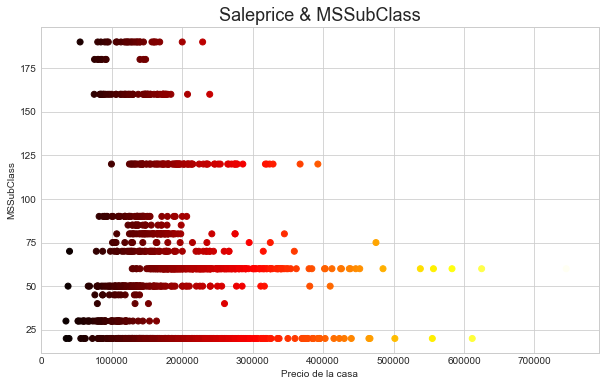

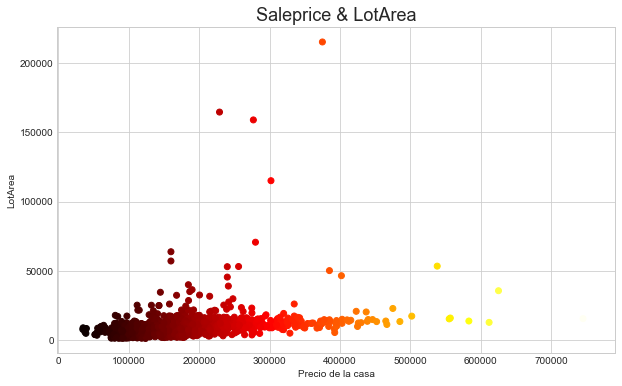

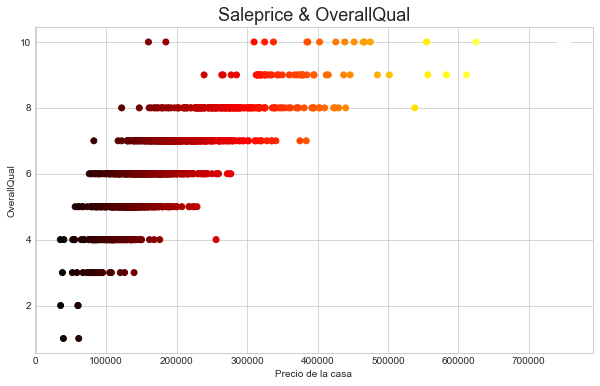

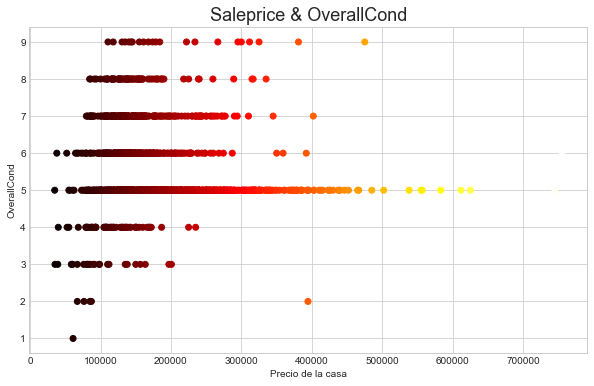

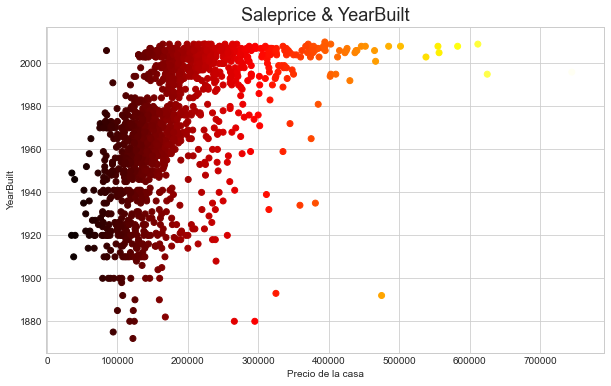

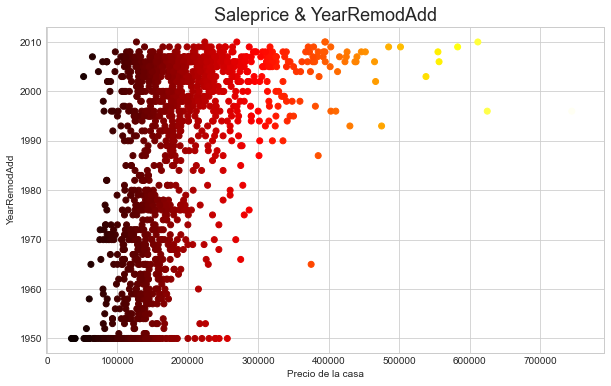

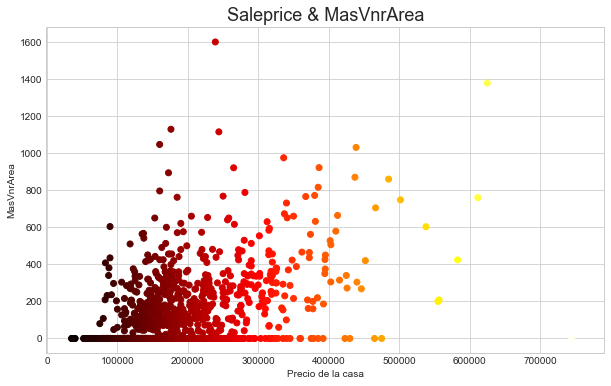

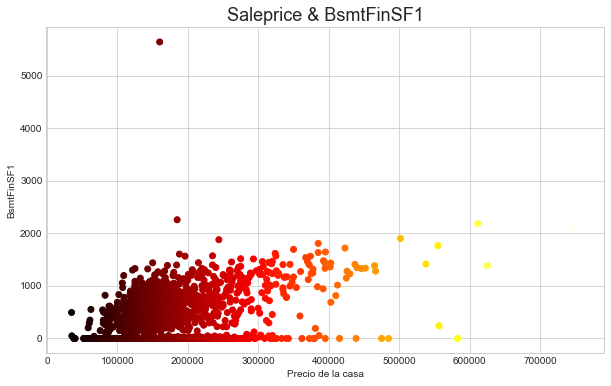

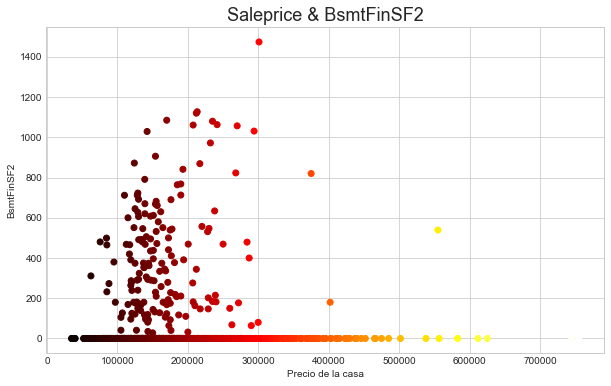

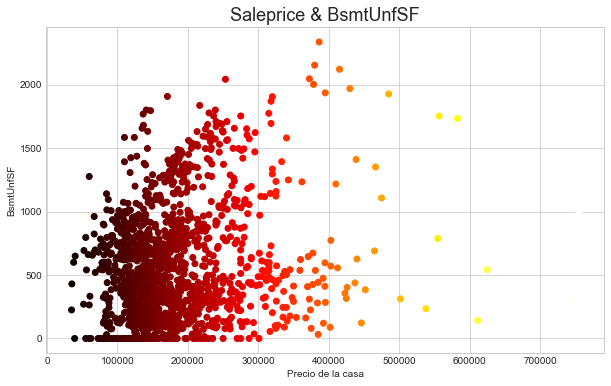

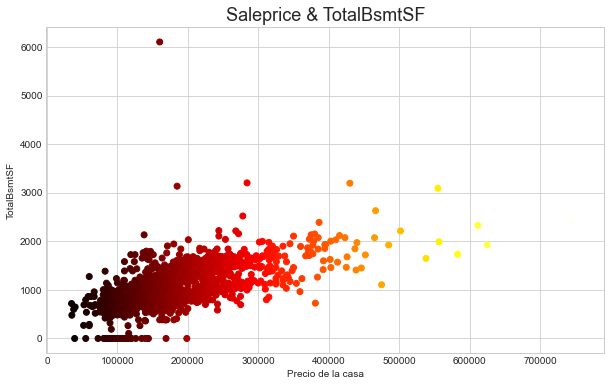

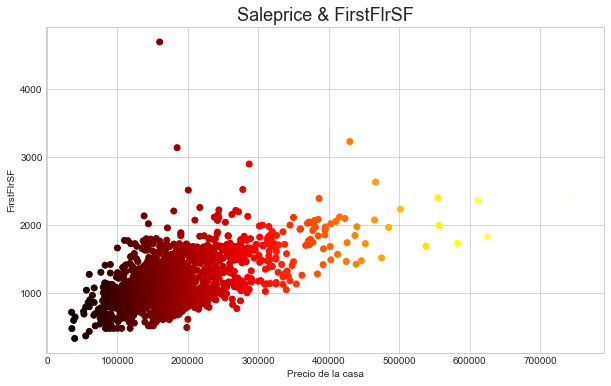

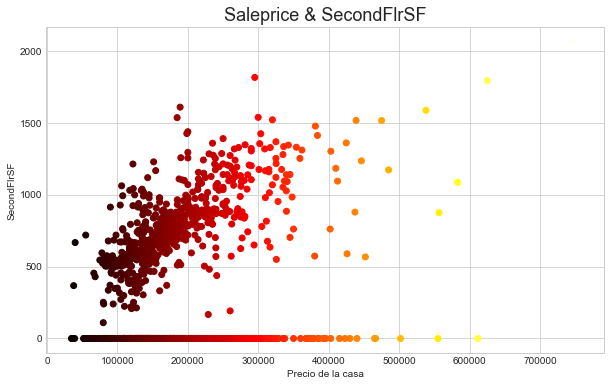

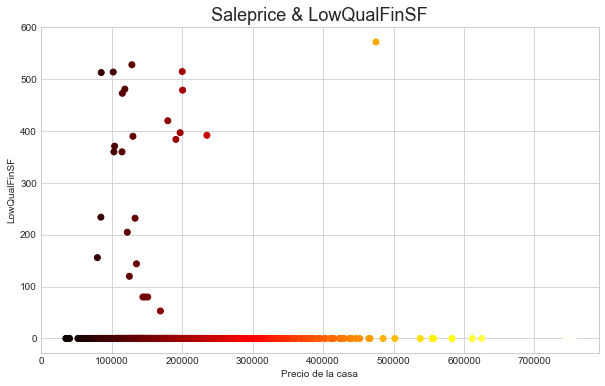

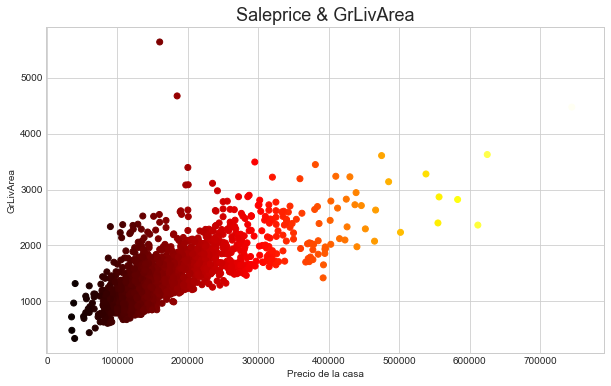

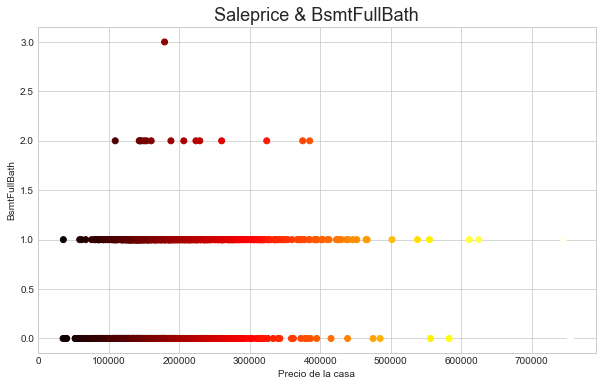

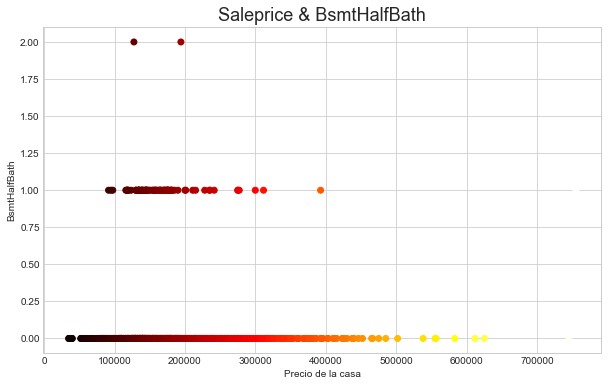

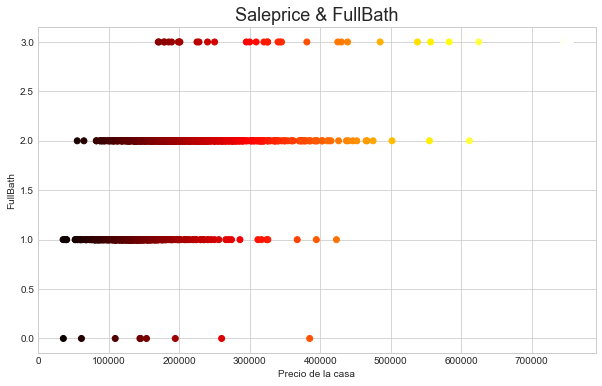

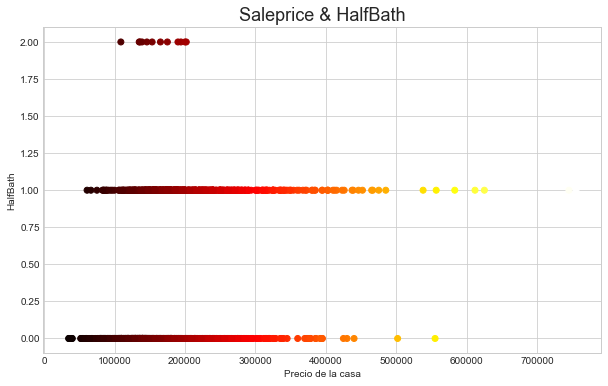

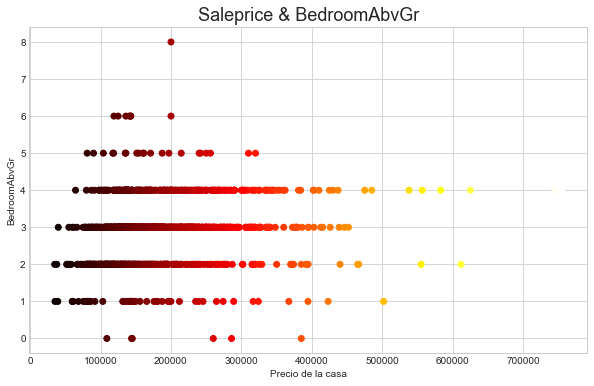

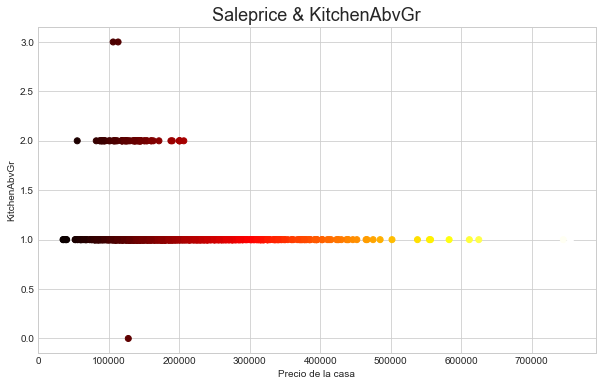

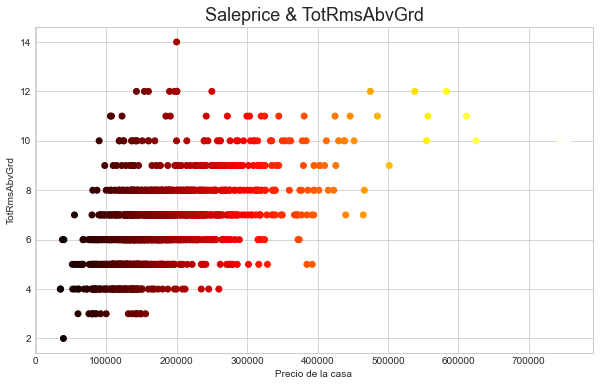

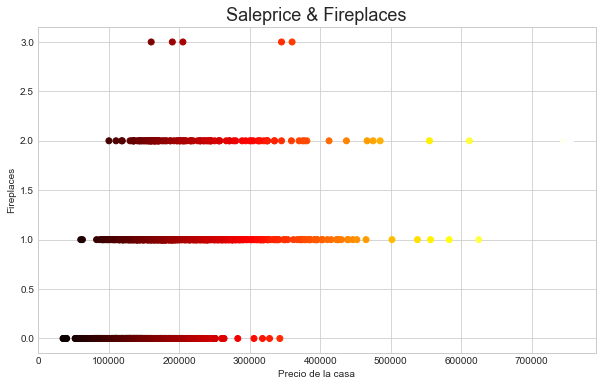

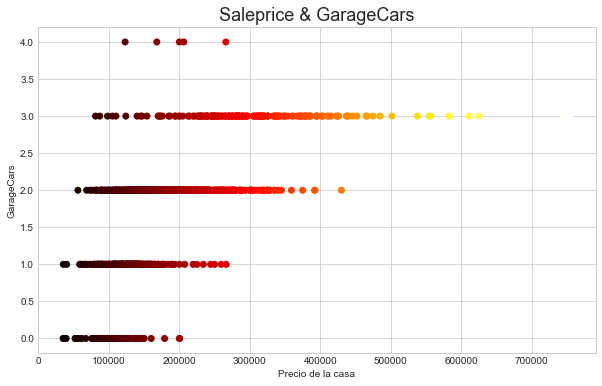

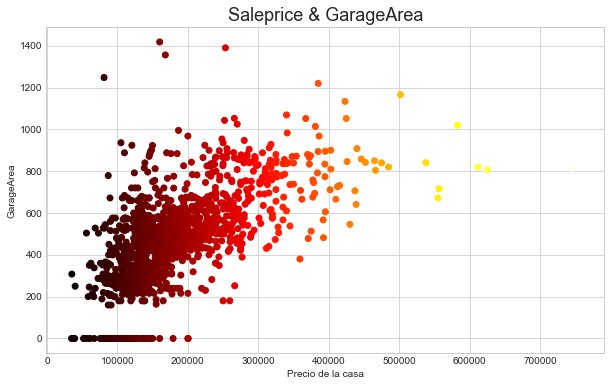

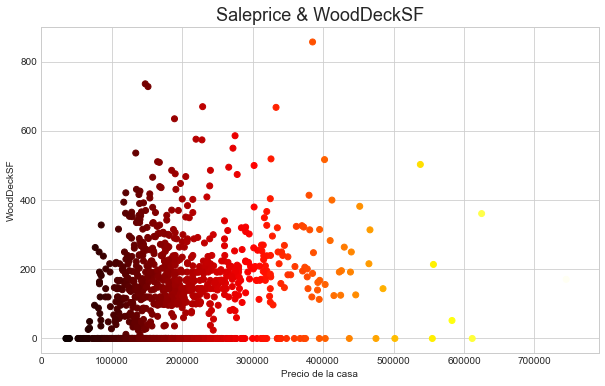

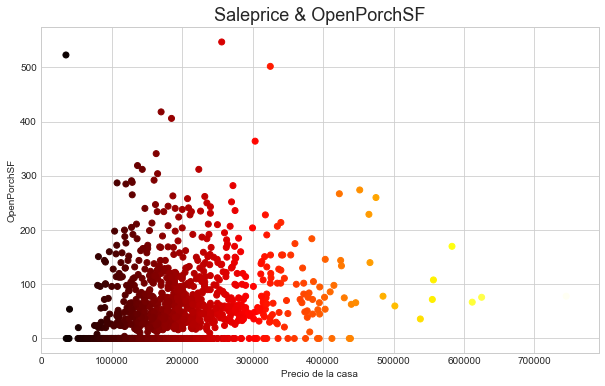

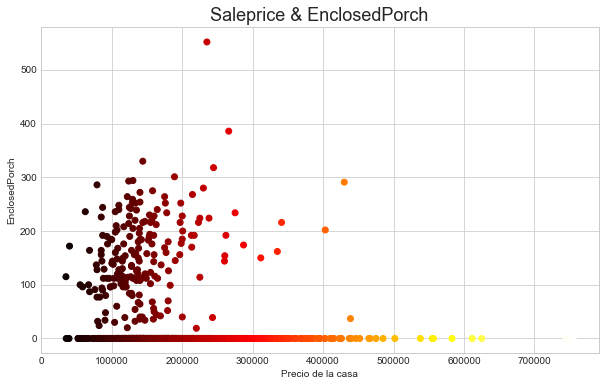

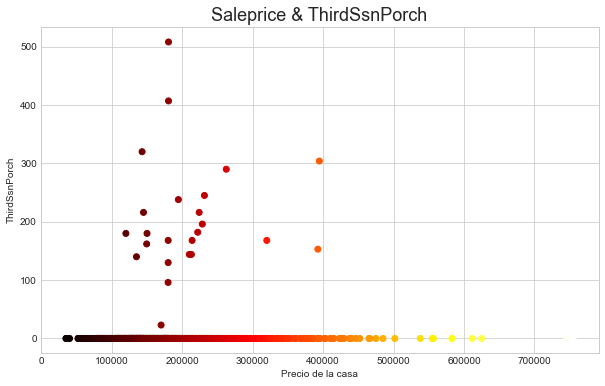

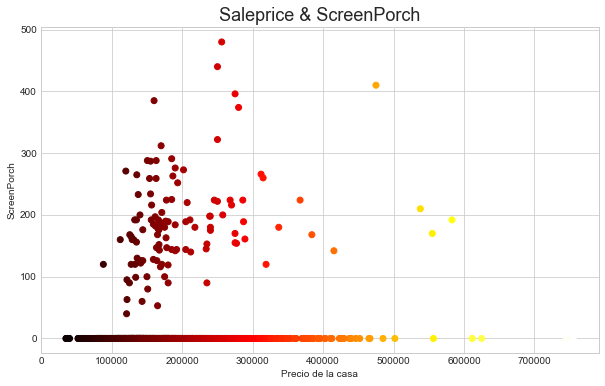

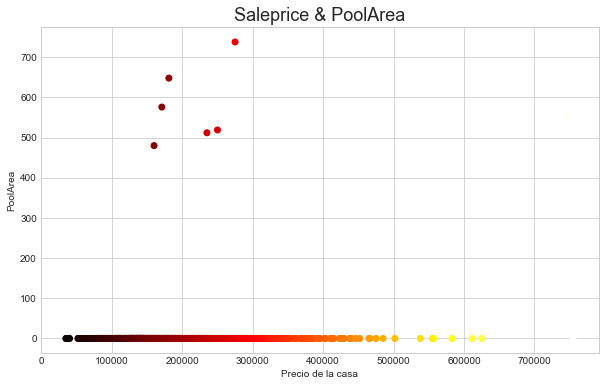

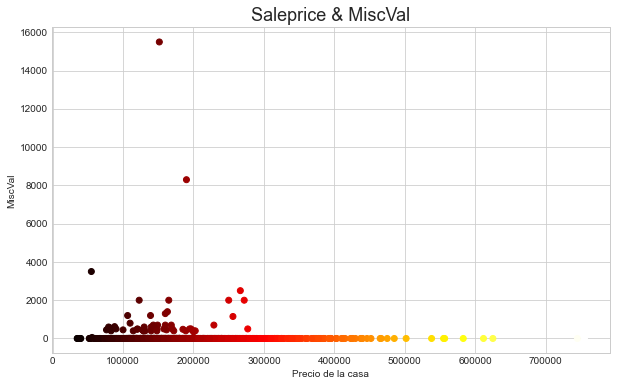

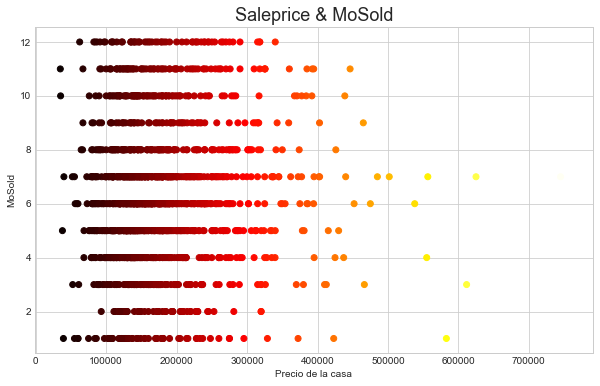

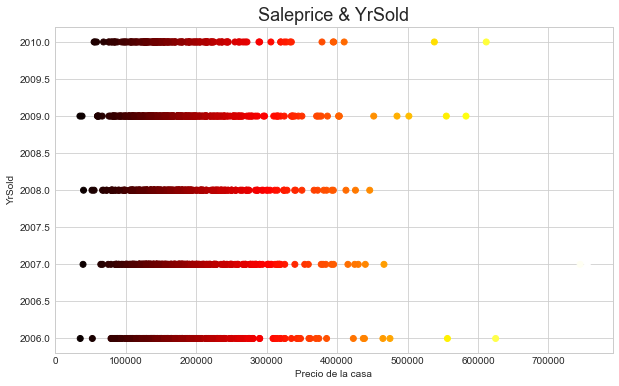

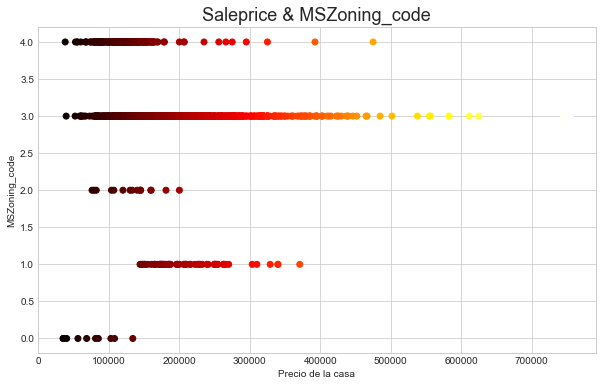

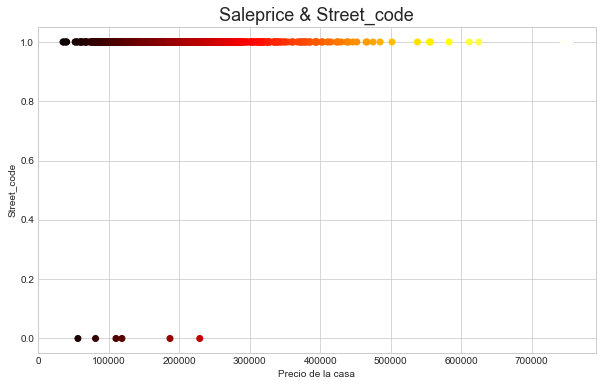

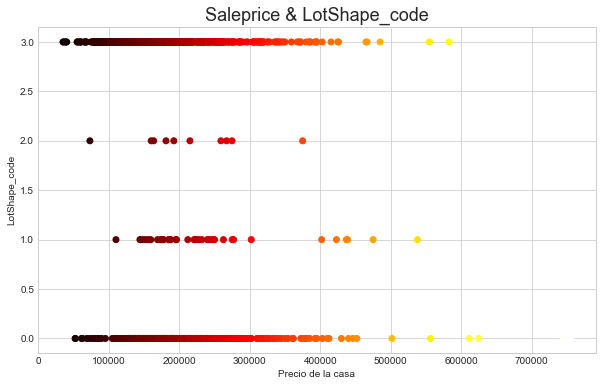

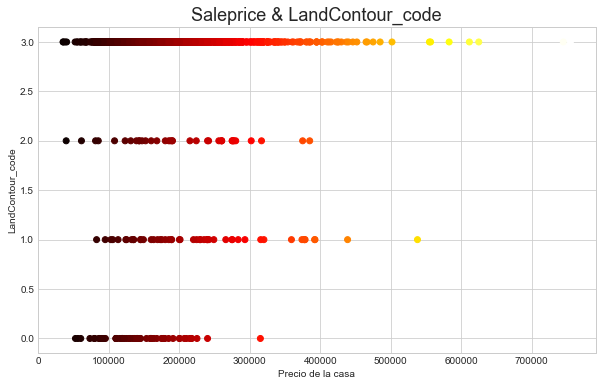

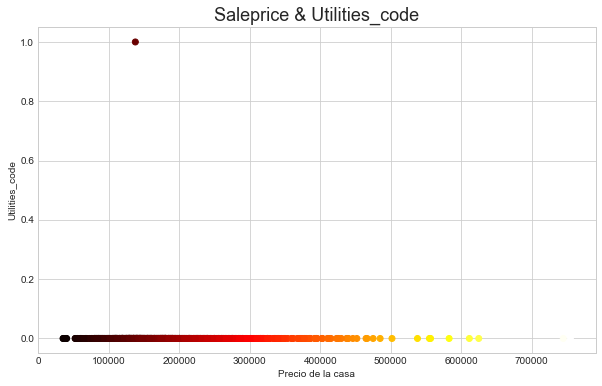

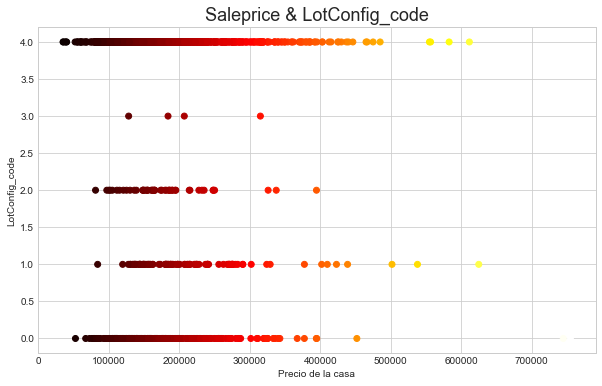

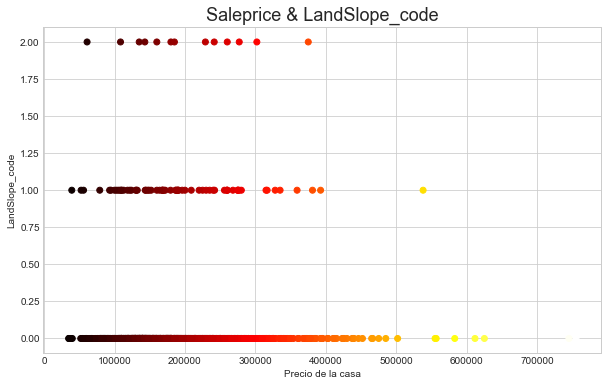

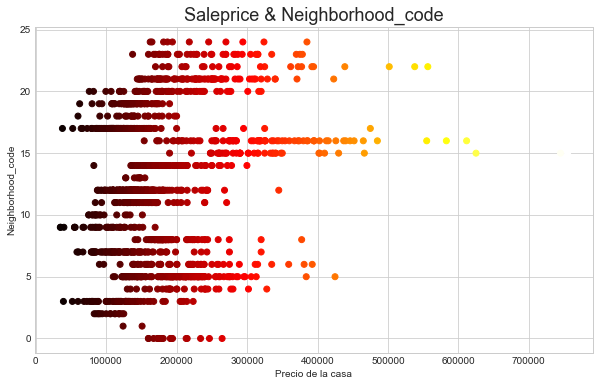

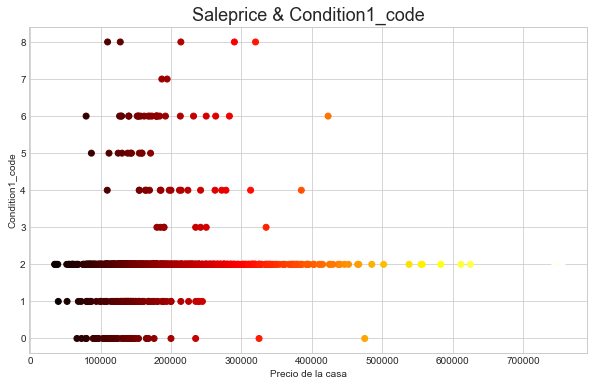

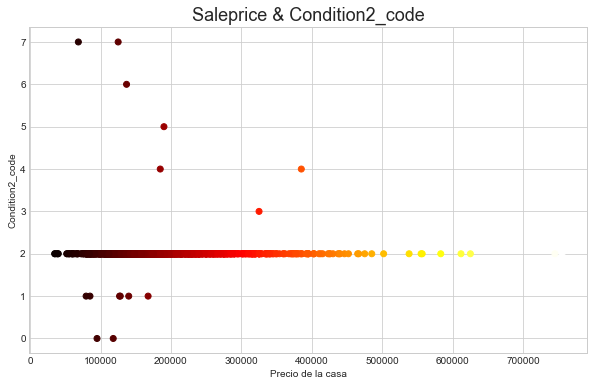

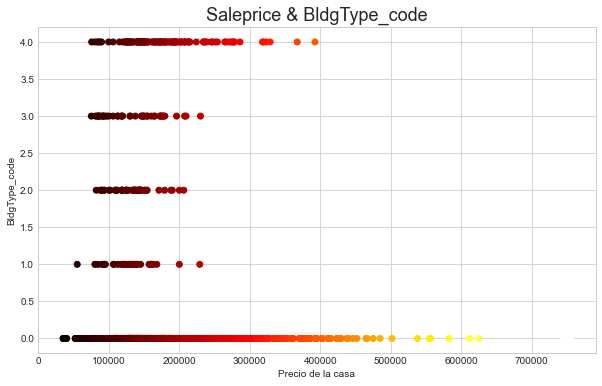

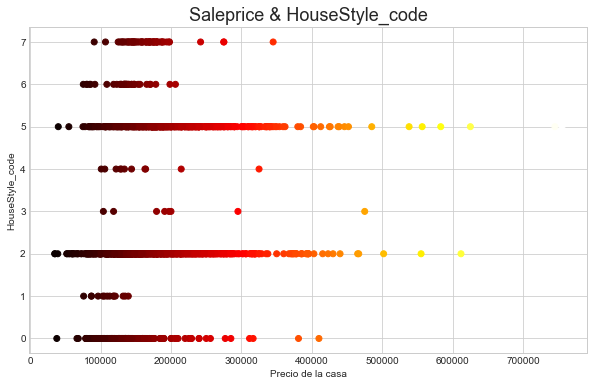

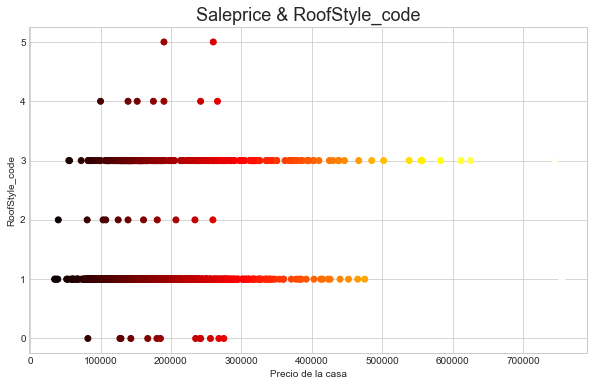

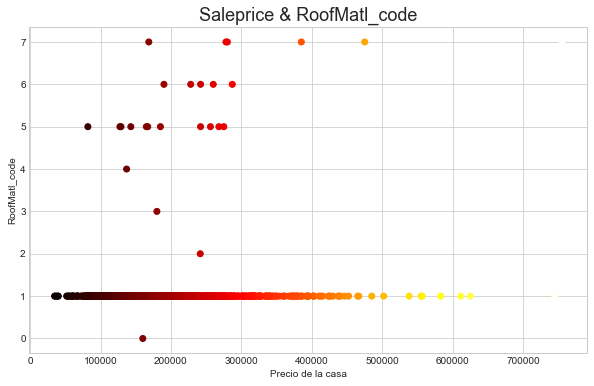

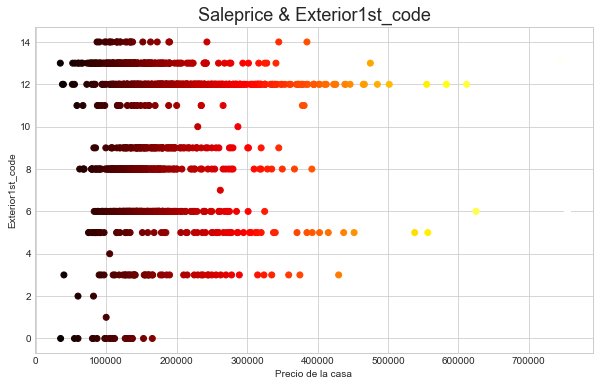

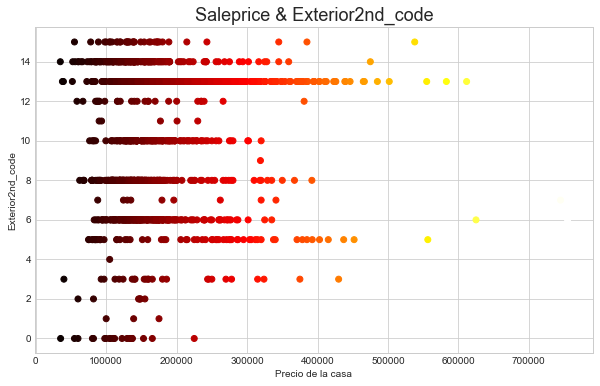

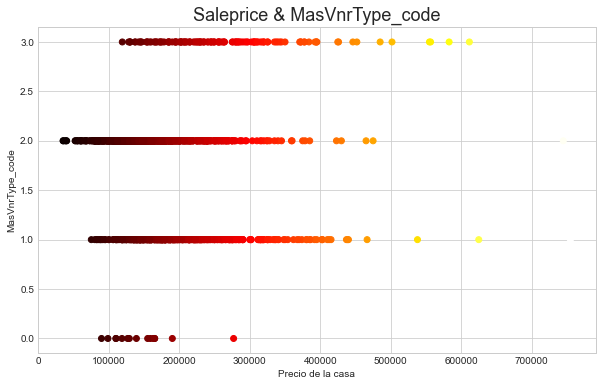

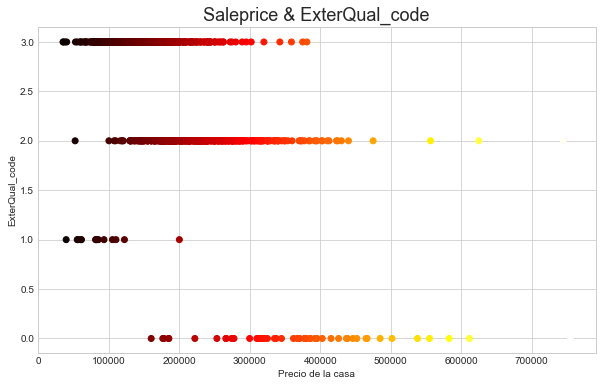

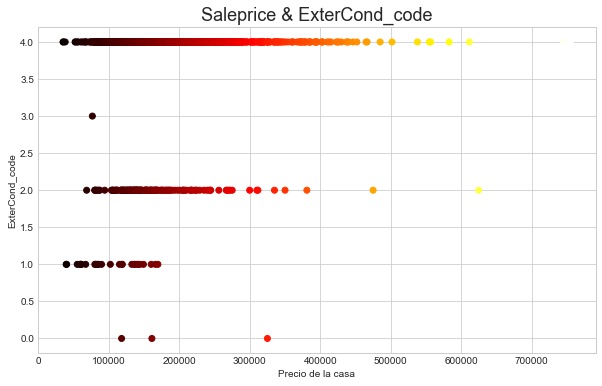

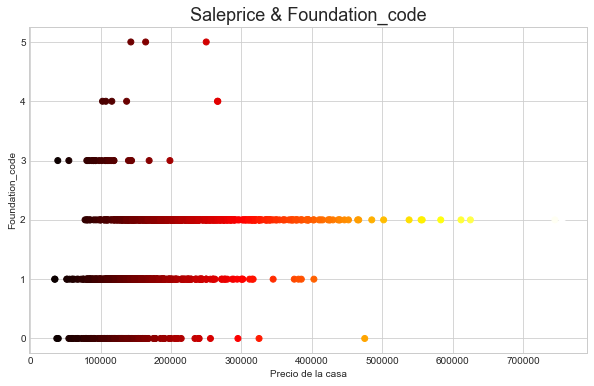

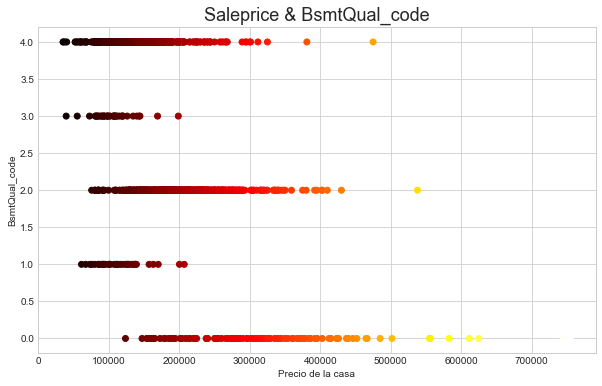

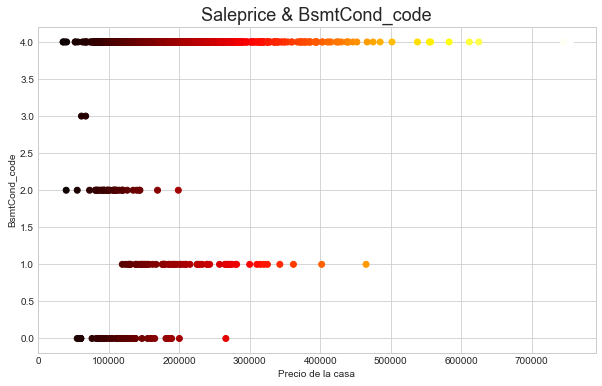

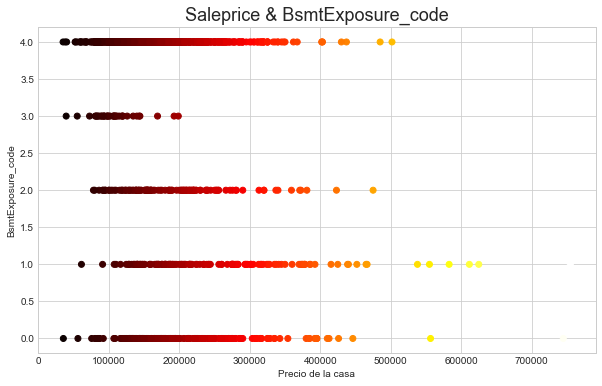

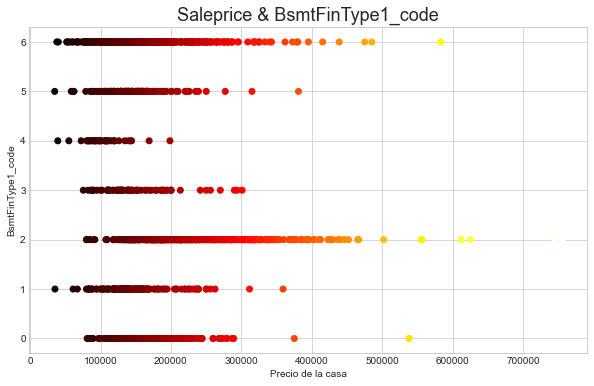

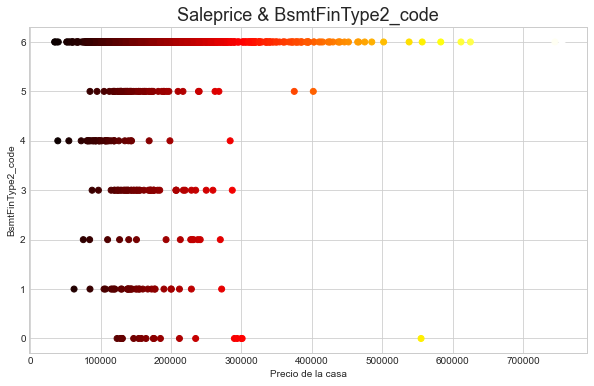

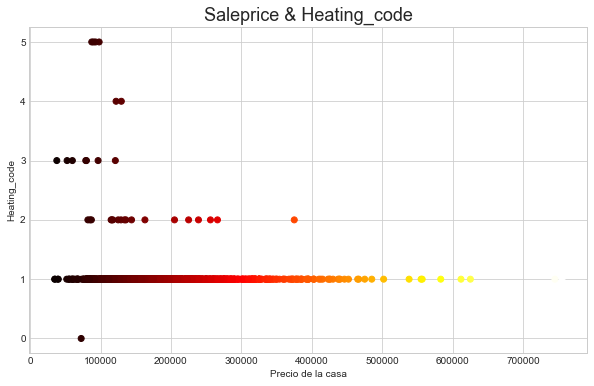

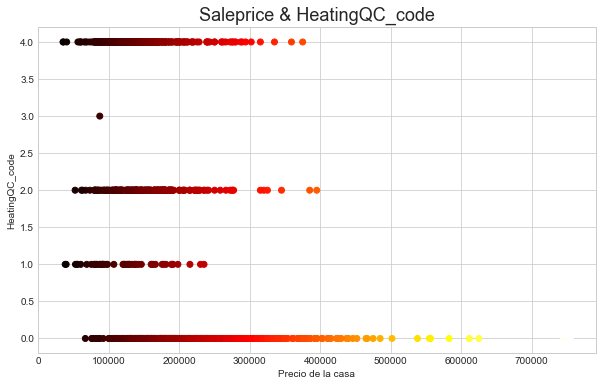

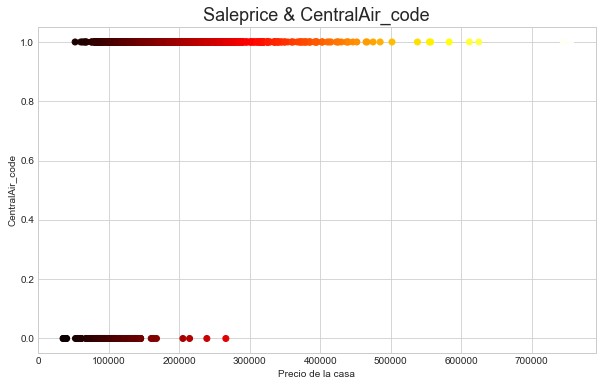

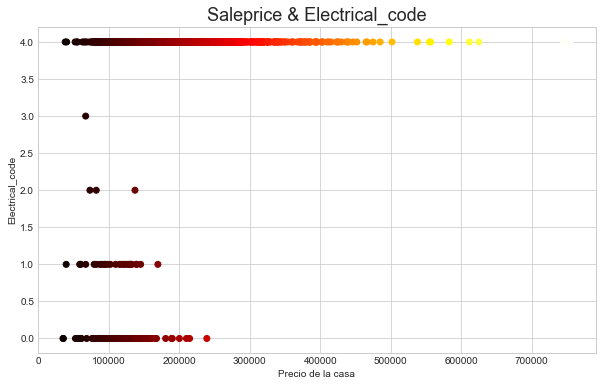

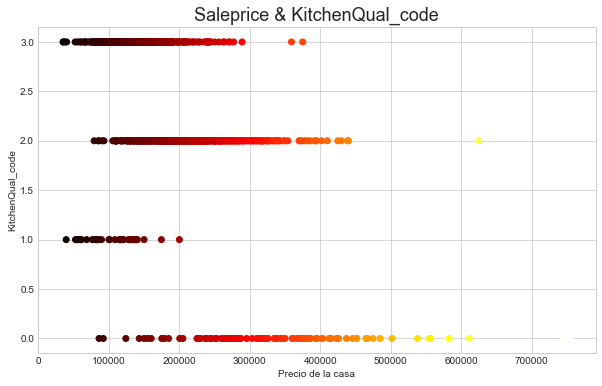

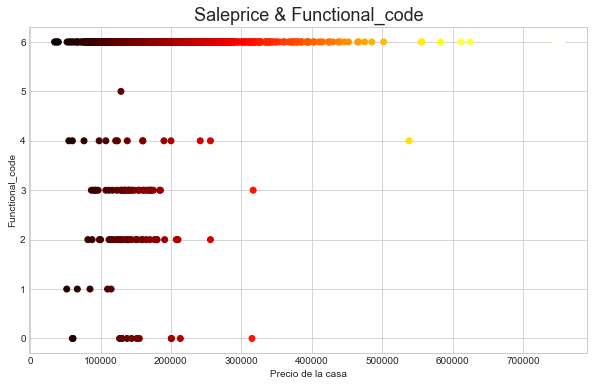

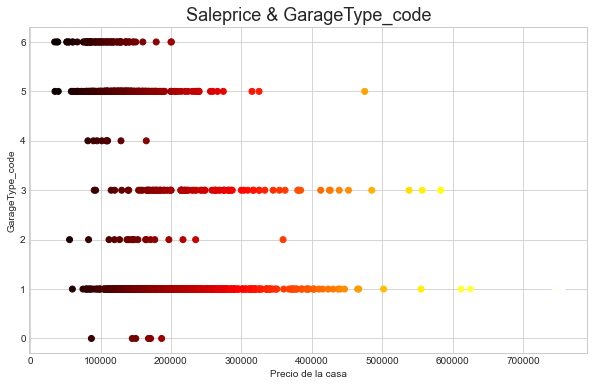

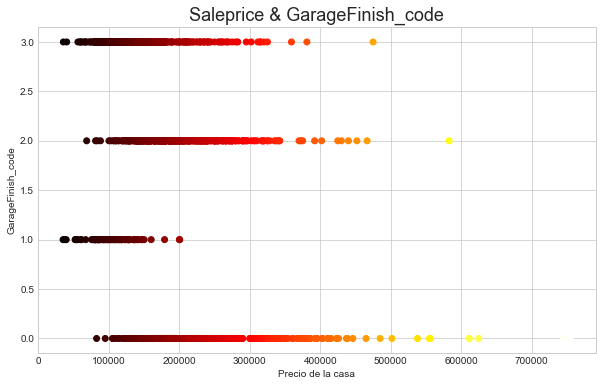

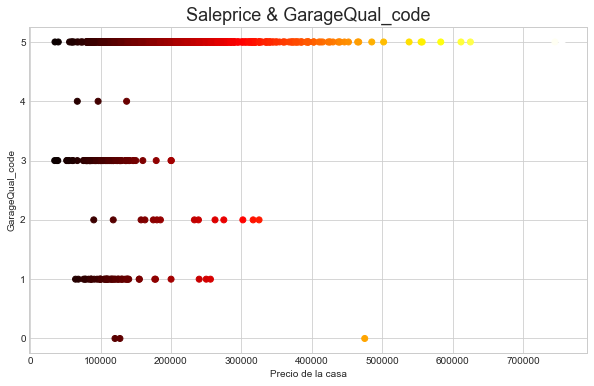

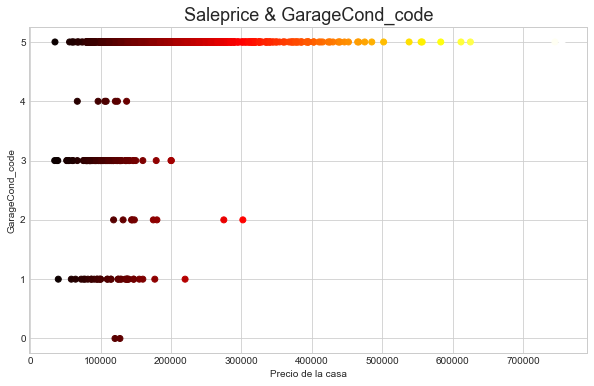

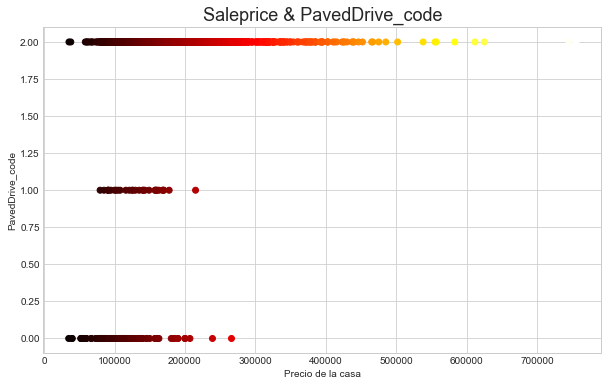

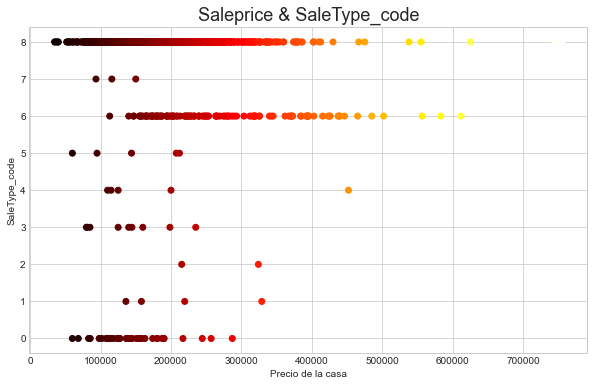

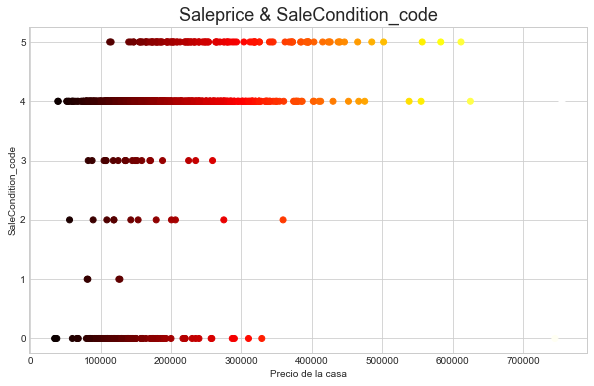

In [41]:
for variable in variables:
    grafica_dispersion (variable)

In [42]:
#Del gráfico de dispersión, podemos observar que las variables que se observa mayor relación con el Precio de venta de las casas son: 
#'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars'. 'GarageArea'

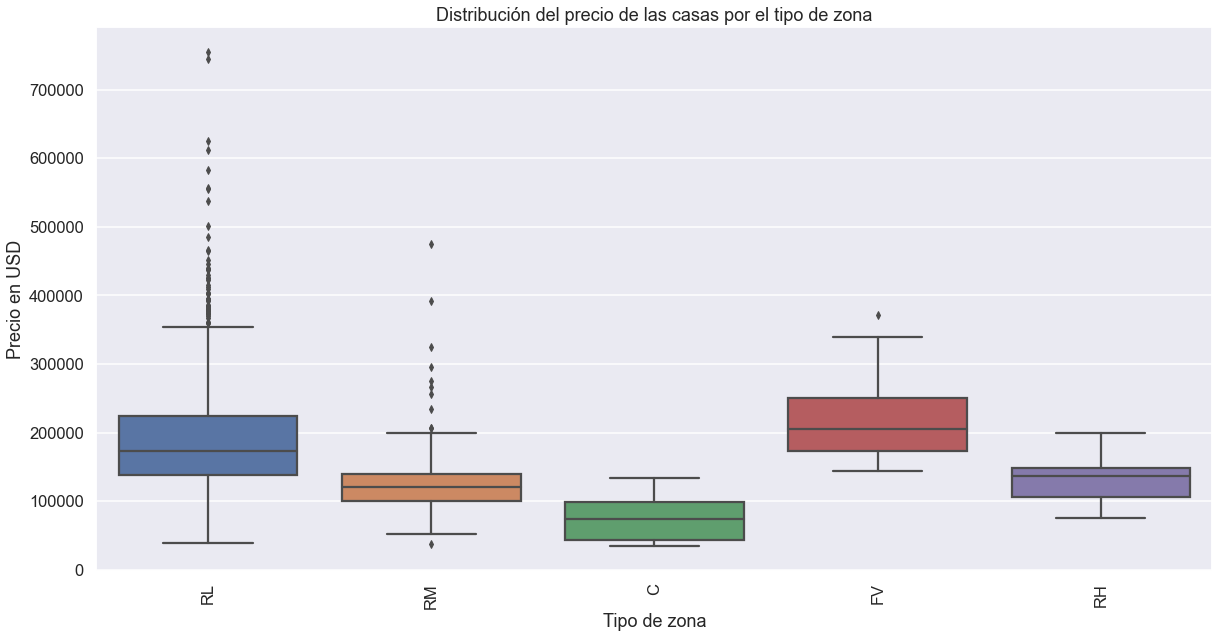

In [142]:
#Hacemos una gráfica de caja para ver como se distribuyen los datos en cuanto al precio y la zona de la casa

sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['MSZoning'], y = data['SalePrice'])

ax.set_title('Distribución del precio de las casas por el tipo de zona')
ax.set(xlabel = 'Tipo de zona', ylabel = "Precio en USD")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [139]:
#Observamos que los precios de las casas se comportan de manera algo similar según la zona. 
#Aunque hay ligeras diferencias, como:
#Para las casas en la zona FV: Floating Village Residential, los precios tienden a ser los más altos.
#Para las casas en la zona C: Commercial, los precios tienden a ser los más bajos.

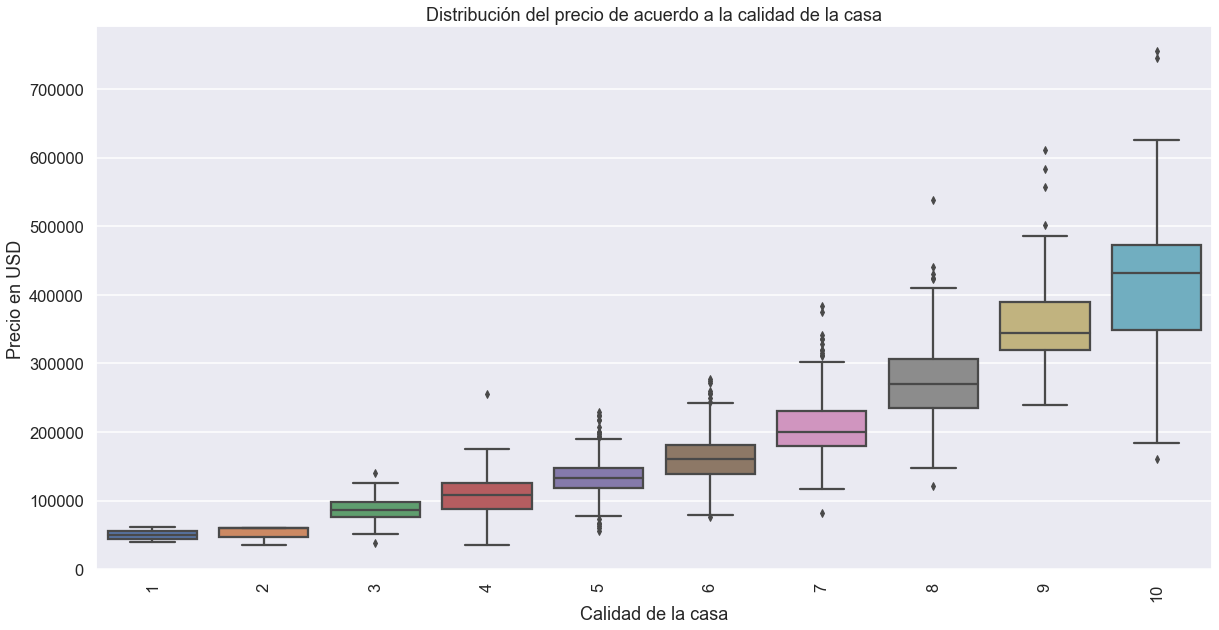

In [45]:
#Hacemos una gráfica de caja para ver como se distribuyen los precios de las casas de acuerdo a la calidad general de la casa

sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['OverallQual'], y = data['SalePrice'])

ax.set_title('Distribución del precio de acuerdo a la calidad de la casa')
ax.set(xlabel='Calidad de la casa', ylabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [46]:
#Observamos una tendencia a que los precios sean mayores entre mejor calidad tenga la casa

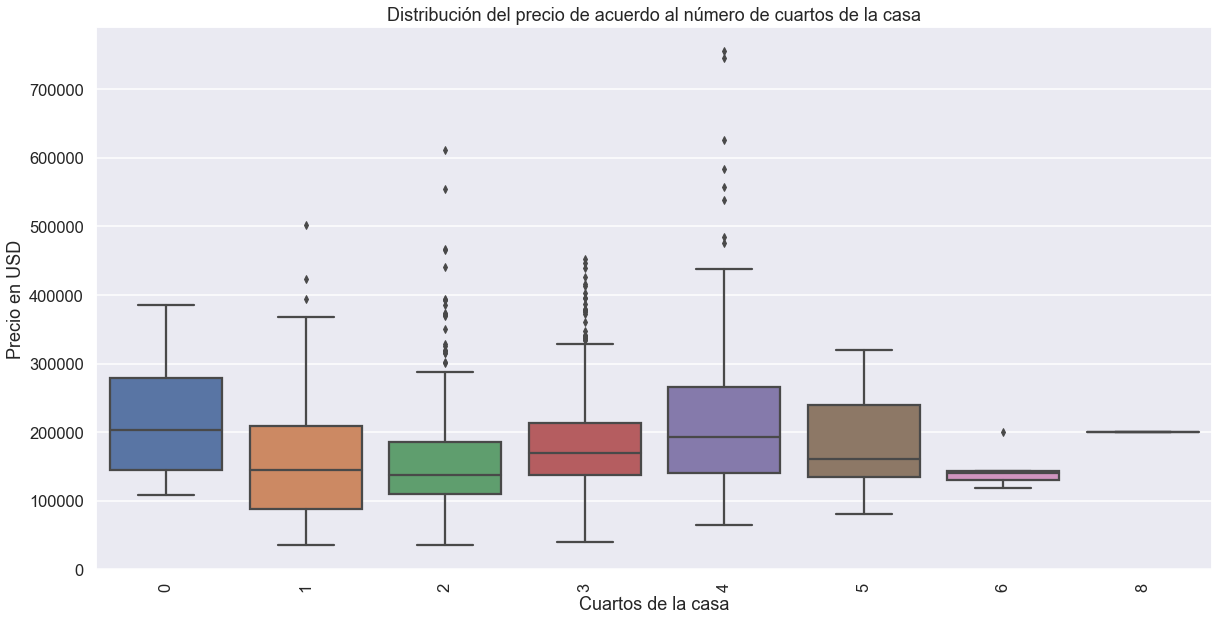

In [47]:
#Hacemos una gráfica de caja para ver como se distribuyen los precios de las casas de acuerdo al número de cuartos en niveles superiores de la casa

sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['BedroomAbvGr'], y = data['SalePrice'])

ax.set_title('Distribución del precio de acuerdo al número de cuartos de la casa')
ax.set(xlabel='Cuartos de la casa', ylabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [48]:
#Observamos que no hay una relación clara entre los precios de la casa y el número de cuartos.

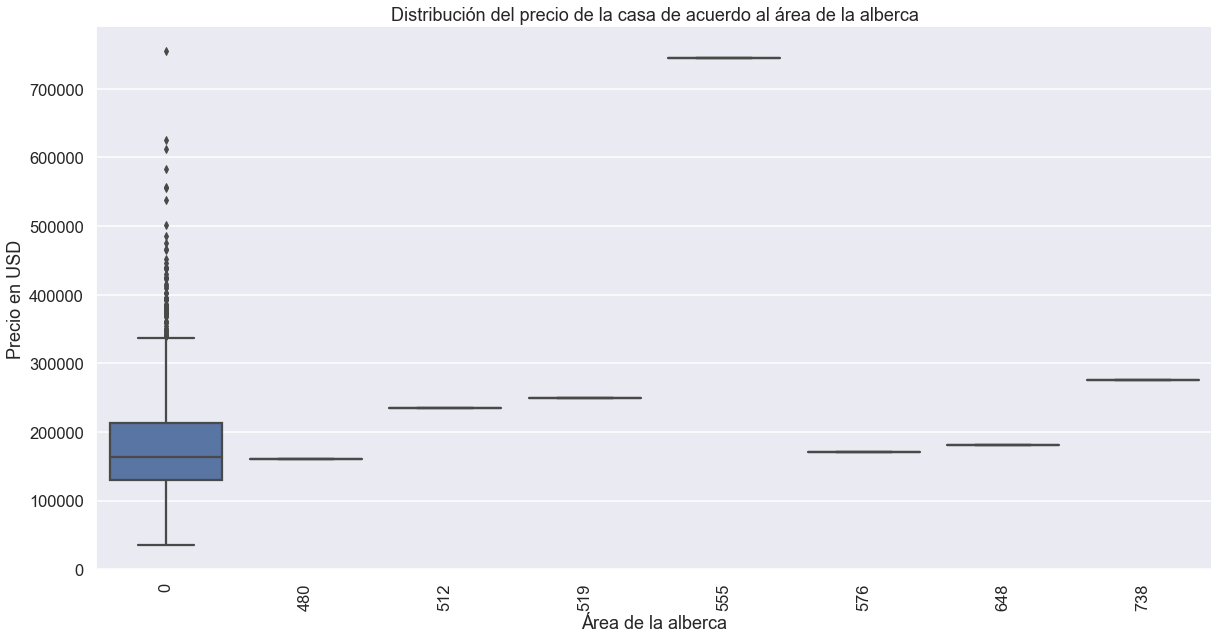

In [49]:
#Hacemos una gráfica de caja para ver como se distribuyen los precios de las casas de acuerdo al tamaño de la alberca de la casa

sns.set(context = 'talk', style ='darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.boxplot(x = data['PoolArea'], y = data['SalePrice'])

ax.set_title('Distribución del precio de la casa de acuerdo al área de la alberca')
ax.set(xlabel='Área de la alberca', ylabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [50]:
#Obervamos que practicamente ninguna casa tiene alberca, por lo que no es un factor que influya tanto en nuestro análisis.

<ipython-input-51-2f61df2aeac6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);


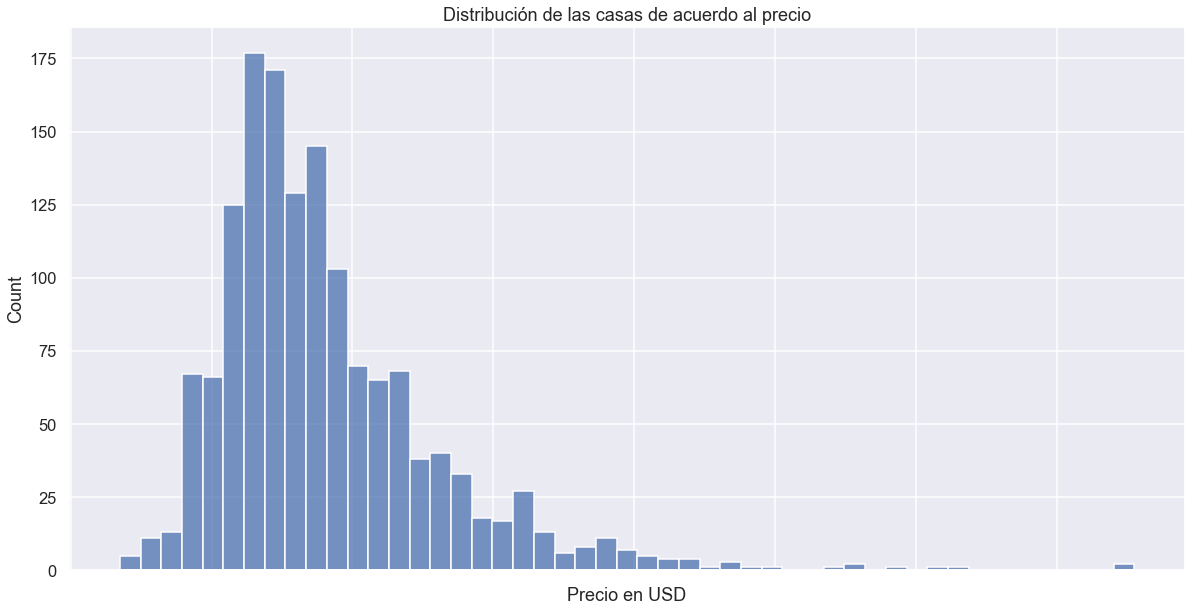

In [51]:
#Podemos hacer un histograma para revisar la distribución de la información
sns.set(context = 'talk', style = 'darkgrid', rc = {'figure.figsize': (20,10)})

ax = sns.histplot(x = data['SalePrice'])

ax.set_title('Distribución de las casas de acuerdo al precio')
ax.set(xlabel = 'Precio en USD')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

In [138]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [52]:
# Observamos que el número de casas se distribuye aparentemente con normalidad

# Análisis estadístico

# PRUEBAS DE HIPÓTESIS

In [53]:
#Después de realizar el análisis visual, obtuvimos ciertas variables que muestran injerencia en el precio de las casas

#Vamos a revisar si al interior de esas variables, las distintas características de cada una, muestran comportamientos
#distintos o similares en cuanto al precio de las casas.

#'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'FirstFlrSF', 
#'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars'. 'GarageArea'

## ¿El precio de las casas será el mismo dependiendo de la Calidad General de la casa 'OverallQual'?

In [54]:
#Revisamos los posibles valores que puede tener la variable
data['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [55]:
# ¿Será igual el precio de las casas de calidad del 1-5 que las casas de calidad del 6-10?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de menor y mayor calidad.

overall_qual_top = data[data['OverallQual'] >= 6]
overall_qual_low = data[data['OverallQual'] <= 5]

print('overall_qual_top Mean:', overall_qual_top.SalePrice.mean())
print('overall_qual_low Mean:', overall_qual_low.SalePrice.mean())

print('overall_qual_top Standard deviation:', overall_qual_top.SalePrice.std())
print('overall_qual_low Standard deviation:', overall_qual_low.SalePrice.std())

statistic, pvalue = ttest_ind(overall_qual_top.SalePrice, overall_qual_low.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

overall_qual_top Mean: 213182.53253796094
overall_qual_low Mean: 125633.18029739778
overall_qual_top Standard deviation: 81301.33014486372
overall_qual_low Standard deviation: 30999.379268775185
Statistic =  29.25590960271384
P-value =  5.975010463829108e-145


In [56]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las 
# casas entre las de menor y mayor calidad.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de menor y mayor calidad.

In [57]:
# ¿Será igual el precio de las casas de calidad del 7-8 que las casas de calidad del 9-10?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de menor y mayor calidad.

overall_qual_7_8 = data[(data['OverallQual'] == 7) | (data['OverallQual'] == 8)]
overall_qual_9_10 = data[(data['OverallQual'] == 9) | (data['OverallQual'] == 10)]

print('overall_qual_7_8 Mean:', overall_qual_7_8.SalePrice.mean())
print('overall_qual_9_10 Mean:', overall_qual_9_10.SalePrice.mean())

print('overall_qual_7_8 Standard deviation:', overall_qual_7_8.SalePrice.std())
print('overall_qual_9_10 Standard deviation:', overall_qual_9_10.SalePrice.std())

statistic, pvalue = ttest_ind(overall_qual_7_8.SalePrice, overall_qual_9_10.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

overall_qual_7_8 Mean: 230835.9527720739
overall_qual_9_10 Mean: 388486.08196721313
overall_qual_7_8 Standard deviation: 60941.046873084444
overall_qual_9_10 Standard deviation: 113694.80502530962
Statistic =  -10.639998872337674
P-value =  8.025238918709692e-16


In [58]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las 
# casas entre las de calidad 7-8 y las de calidad 9-10

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de calidad 7-8 y 9-10.

In [59]:
# ¿Será igual el precio de las casas de calidad del 9 que las casas de calidad del 10?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de menor y mayor calidad.

overall_qual_9 = data[(data['OverallQual'] == 9)]
overall_qual_10 = data[(data['OverallQual'] == 10)]

print('overall_qual_9 Mean:', overall_qual_9.SalePrice.mean())
print('overall_qual_10 Mean:', overall_qual_10.SalePrice.mean())

print('overall_qual_9 Standard deviation:', overall_qual_9.SalePrice.std())
print('overall_qual_10 Standard deviation:', overall_qual_10.SalePrice.std())

statistic, pvalue = ttest_ind(overall_qual_9.SalePrice, overall_qual_10.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

overall_qual_9 Mean: 367513.0232558139
overall_qual_10 Mean: 438588.3888888889
overall_qual_9 Standard deviation: 81278.17484929628
overall_qual_10 Standard deviation: 159785.49105786977
Statistic =  -1.7926147376846067
P-value =  0.08760384326170945


In [60]:
# El p-value es mayor a 0.01, de 0.0876, por lo que se acepta la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no hay diferencia en el precio de las casas 
# entre las de calidad 9 y las de calidad 10.

#Si el nivel de confianza lo bajaramos a 90%, rechazaríamos la hipótesis nula.

In [61]:
# CONCLUSIÓN GENERAL: El precio de las casas si varía dependiendo de la calidad general de la misma.

# Entre las calidades top ( 8 y 9) no hay variación en el precio de las casas, por lo que se sugiere escoger una 
# casa con calidad general 10, en lugar de 9.

## ¿El precio de las casas será el mismo dependiendo del número de Cuartos que tiene en los niveles superiores, sin incluir baños 'TotRmsAbvGrd'?

In [62]:
#Revisamos los posibles valores que puede tener la variable
data['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

In [63]:
# ¿Será igual el precio de las casas que tienen de 0-7 cuartos en niveles superiores que las que tienen de 8 a 14?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de 0-7 y las de 8-14 cuartos en el nivel superior

cuartos_superiores_8_14 = data[data['TotRmsAbvGrd'] >= 8]
cuartos_superiores_0_7 = data[data['TotRmsAbvGrd'] <= 7]

print('cuartos_superiores_8_14 Mean:', cuartos_superiores_8_14.SalePrice.mean())
print('cuartos_superiores_0_7 Mean:', cuartos_superiores_0_7.SalePrice.mean())

print('cuartos_superiores_8_14 Standard deviation:', cuartos_superiores_8_14.SalePrice.std())
print('cuartos_superiores_0_7 Standard deviation:', cuartos_superiores_0_7.SalePrice.std())

statistic, pvalue = ttest_ind(cuartos_superiores_8_14.SalePrice, cuartos_superiores_0_7.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

cuartos_superiores_8_14 Mean: 241372.46017699115
cuartos_superiores_0_7 Mean: 162640.21587867974
cuartos_superiores_8_14 Standard deviation: 104698.16782743022
cuartos_superiores_0_7 Standard deviation: 58929.409894106735
Statistic =  13.22656627938876
P-value =  1.91974935142139e-33


In [64]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de 0-7 cuartos y las de 8-14 cuartos en el nivel superior de la casa.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de 0-7 cuartos y las de 8-14 
# cuartos en el nivel superior de la casa.

In [65]:
# ¿Será igual el precio de las casas que tienen de 3-4 cuartos en niveles superiores que las que tienen de 5 a 6?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de 3-4 y las de 5-6 cuartos en el nivel superior

cuartos_superiores_3_4 = data[(data['TotRmsAbvGrd'] == 3) | (data['TotRmsAbvGrd'] == 4)]
cuartos_superiores_5_6 = data[(data['TotRmsAbvGrd'] == 5) | (data['TotRmsAbvGrd'] == 6)]

print('cuartos_superiores_3_4 Mean:', cuartos_superiores_3_4.SalePrice.mean())
print('cuartos_superiores_5_6 Mean:', cuartos_superiores_5_6.SalePrice.mean())

print('cuartos_superiores_3_4 Standard deviation:', cuartos_superiores_3_4.SalePrice.std())
print('cuartos_superiores_5_6 Standard deviation:', cuartos_superiores_5_6.SalePrice.std())

statistic, pvalue = ttest_ind(cuartos_superiores_3_4.SalePrice, cuartos_superiores_5_6.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

cuartos_superiores_3_4 Mean: 121110.78070175438
cuartos_superiores_5_6 Mean: 153279.73559822747
cuartos_superiores_3_4 Standard deviation: 40584.40206865277
cuartos_superiores_5_6 Standard deviation: 50010.034828106145
Statistic =  -7.552472725988992
P-value =  2.2193151059549155e-12


In [66]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de 3-4 cuartos y las de 5-6 cuartos en el nivel superior de la casa.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de 3-4 cuartos y las de 5-6 
# cuartos en el nivel superior de la casa.

In [67]:
# ¿Será igual el precio de las casas que tienen de 5 cuartos en niveles superiores que las que tienen de 6?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de 5 y las de 6 cuartos en el nivel superior

cuartos_superiores_5 = data[data['TotRmsAbvGrd'] == 5]
cuartos_superiores_6 = data[data['TotRmsAbvGrd'] == 6]

print('cuartos_superiores_5 Mean:', cuartos_superiores_5.SalePrice.mean())
print('cuartos_superiores_6 Mean:', cuartos_superiores_6.SalePrice.mean())

print('cuartos_superiores_5 Standard deviation:', cuartos_superiores_5.SalePrice.std())
print('cuartos_superiores_6 Standard deviation:', cuartos_superiores_6.SalePrice.std())

statistic, pvalue = ttest_ind(cuartos_superiores_5.SalePrice, cuartos_superiores_6.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

cuartos_superiores_5 Mean: 141550.74909090908
cuartos_superiores_6 Mean: 161303.2960199005
cuartos_superiores_5 Standard deviation: 49656.905699641524
cuartos_superiores_6 Standard deviation: 48707.372941243106
Statistic =  -5.122660025762534
P-value =  4.104433008574288e-07


In [68]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de 5 cuartos y las de 6 cuartos en el nivel superior de la casa.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de 5 cuartos y las de 6 
# cuartos en el nivel superior de la casa.

In [69]:
# ¿Será igual el precio de las casas que tienen de 4 cuartos en niveles superiores que las que tienen de 5?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de 5 y las de 6 cuartos en el nivel superior

cuartos_superiores_5 = data[data['TotRmsAbvGrd'] == 5]
cuartos_superiores_4 = data[data['TotRmsAbvGrd'] == 4]

print('cuartos_superiores_5 Mean:', cuartos_superiores_5.SalePrice.mean())
print('cuartos_superiores_4 Mean:', cuartos_superiores_4.SalePrice.mean())

print('cuartos_superiores_5 Standard deviation:', cuartos_superiores_5.SalePrice.std())
print('cuartos_superiores_4 Standard deviation:', cuartos_superiores_4.SalePrice.std())

statistic, pvalue = ttest_ind(cuartos_superiores_5.SalePrice, cuartos_superiores_4.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

cuartos_superiores_5 Mean: 141550.74909090908
cuartos_superiores_4 Mean: 122844.62886597938
cuartos_superiores_5 Standard deviation: 49656.905699641524
cuartos_superiores_4 Standard deviation: 41661.805370326816
Statistic =  3.60933391041434
P-value =  0.00038849023116544856


In [70]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de 4 cuartos y las de 5 cuartos en el nivel superior de la casa.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de 4 cuartos y las de 5 
# cuartos en el nivel superior de la casa.

In [71]:
# CONCLUSIÓN GENERAL: El precio de las casas si varía dependiendo de los cuartos que se quieran en el nivel superior
# Hay que elegir una casa con los cuartos que se necesiten, sin dejar cuartos adicionales, porque será más cara.

## ¿El precio de las casas será el mismo dependiendo del número de carros que caben en el Garage  'GarageCars'?

In [72]:
#Revisamos los posibles valores que puede tener la variable
data['GarageCars'].unique()

array([2, 3, 1, 0, 4])

In [73]:
# ¿Será igual el precio de las casas que tienen 0 - 2 espacios para carros en el Garage que las que tienen 3 - 4?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de 0-2 y las de 3-4 espacios para carros en el Garage

garage_lugares_3_4 = data[data['GarageCars'] >= 3]
garage_lugares_0_2 = data[data['GarageCars'] <= 2]

print('garage_lugares_3_4 Mean:', garage_lugares_3_4.SalePrice.mean())
print('garage_lugares_0_2 Mean:', garage_lugares_0_2.SalePrice.mean())

print('garage_lugares_3_4 Standard deviation:', garage_lugares_3_4.SalePrice.std())
print('garage_lugares_0_2 Standard deviation:', garage_lugares_0_2.SalePrice.std())

statistic, pvalue = ttest_ind(garage_lugares_3_4.SalePrice, garage_lugares_0_2.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

garage_lugares_3_4 Mean: 306491.48924731184
garage_lugares_0_2 Mean: 162588.3273155416
garage_lugares_3_4 Standard deviation: 107352.62031476379
garage_lugares_0_2 Standard deviation: 54020.232114505336
Statistic =  17.952766824981104
P-value =  1.7731433520622204e-43


In [74]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de 0-2 y las de 3-4 espacios para carros en el garage.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de 0-2 y las de 3-4 espacios para carros en el garage.


In [75]:
# ¿Será igual el precio de las casas que tienen 3 espacios para carros en el Garage que las que tienen 4?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de 0-2 y las de 3-4 espacios para carros en el Garage

garage_lugares_4 = data[data['GarageCars'] == 4]
garage_lugares_3 = data[data['GarageCars'] == 3]

print('garage_lugares_4 Mean:', garage_lugares_4.SalePrice.mean())
print('garage_lugares_3 Mean:', garage_lugares_3.SalePrice.mean())

print('garage_lugares_4 Standard deviation:', garage_lugares_4.SalePrice.std())
print('garage_lugares_3 Standard deviation:', garage_lugares_3.SalePrice.std())

statistic, pvalue = ttest_ind(garage_lugares_4.SalePrice, garage_lugares_3.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

garage_lugares_4 Mean: 192655.8
garage_lugares_3 Mean: 309636.1215469613
garage_lugares_4 Standard deviation: 52621.839745489706
garage_lugares_3 Standard deviation: 106832.92593867525
Statistic =  -4.70995286447646
P-value =  0.005396016550103566


In [76]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de 3 y las de 4 espacios para carros en el garage.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de 3 y las de 4 espacios para carros en el garage.


In [77]:
# ¿Será igual el precio de las casas que tienen 2 espacios para carros en el Garage que las que tienen 3?

#Hipótesis nula: No hay diferencia en el precio de las casas entre las de 0-2 y las de 3-4 espacios para carros en el Garage

garage_lugares_3 = data[data['GarageCars'] == 3]
garage_lugares_2 = data[data['GarageCars'] == 2]

print('garage_lugares_3 Mean:', garage_lugares_3.SalePrice.mean())
print('garage_lugares_2 Mean:', garage_lugares_2.SalePrice.mean())

print('garage_lugares_3 Standard deviation:', garage_lugares_3.SalePrice.std())
print('garage_lugares_2 Standard deviation:', garage_lugares_2.SalePrice.std())

statistic, pvalue = ttest_ind(garage_lugares_3.SalePrice, garage_lugares_2.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

garage_lugares_3 Mean: 309636.1215469613
garage_lugares_2 Mean: 183851.66383495147
garage_lugares_3 Standard deviation: 106832.92593867525
garage_lugares_2 Standard deviation: 51617.14425804544
Statistic =  15.449072358248962
P-value =  6.806363909323916e-36


In [78]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de 2 y las de 3 espacios para carros en el garage.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de 2 y las de 3 espacios para carros en el garage.


In [79]:
# CONCLUSIÓN GENERAL: El precio de las casas si varía dependiendo del número de espacios para carros en el garage

# Hay que elegir una casa con los espacios de carros en el garage que se necesiten, 
# sin tener espacios adicionales, porque será más cara.

## ¿El precio de las casas será el mismo dependiendo de la zona donde se elija la casa 'MSZoning'?

In [80]:
#Revisamos los posibles valores que puede tener la variable
data['MSZoning'].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [81]:
data['MSZoning'].value_counts()

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

In [82]:
#Las posibles zonas son: 
# A: Agriculture
# C: Commercial
# FV: Floating Village Residential
# I: Industrial
# RH: Residential High Density
# RL: Residential Low Density
# RP: Residential Low Density Park 
# RM: Residential Medium Density

In [83]:
# ¿Será igual el precio de las casas en las zonas Residenciales que en la zona Comercial?

#Hipótesis nula: No hay diferencia en el precio de las casas en las zonas Residenciales que en la zona Comercial?

zona_comercial = data[data['MSZoning'] == 'C']
zona_residencial = data[data['MSZoning'] != 'C']

print('zona_comercial Mean:', zona_comercial.SalePrice.mean())
print('zona_residencial Mean:', zona_residencial.SalePrice.mean())

print('zona_comercial Standard deviation:', zona_comercial.SalePrice.std())
print('zona_residencial Standard deviation:', zona_residencial.SalePrice.std())

statistic, pvalue = ttest_ind(zona_comercial.SalePrice, zona_residencial.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

zona_comercial Mean: 74528.0
zona_residencial Mean: 181654.94206896552
zona_comercial Standard deviation: 33791.092031283435
zona_residencial Standard deviation: 79176.48524130823
Statistic =  -9.84070869012896
P-value =  2.337770495320041e-06


In [84]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de las zonas Residenciales que las de la zona Comercial.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de las zonas Residenciales que las de la zona Comercial.


In [85]:
# ¿Será igual el precio de las casas en las zonas Residenciales de alta densidad que las de baja densidad?

#Hipótesis nula: No hay diferencia en el precio de las casas en las zonas Residenciales que en la zona Comercial?

zona_residencial_HD = data[data['MSZoning'] == 'RH']
zona_residencial_LD = data[data['MSZoning'] == 'RL']

print('zona_residencial_HD Mean:', zona_residencial_HD.SalePrice.mean())
print('zona_residencial_LD Mean:', zona_residencial_LD.SalePrice.mean())

print('zona_residencial_HD Standard deviation:', zona_residencial_HD.SalePrice.std())
print('zona_residencial_LD Standard deviation:', zona_residencial_LD.SalePrice.std())

statistic, pvalue = ttest_ind(zona_residencial_HD.SalePrice, zona_residencial_LD.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

zona_residencial_HD Mean: 131558.375
zona_residencial_LD Mean: 191004.99478714162
zona_residencial_HD Standard deviation: 35714.11843491777
zona_residencial_LD Standard deviation: 80766.34131930246
Statistic =  -6.433298047913898
P-value =  5.832821444845453e-06


In [86]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de las zonas Residenciales de alta y baja densidad.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de las zonas Residenciales alta y baja densidad.


In [87]:
# ¿Será igual el precio de las casas en las zonas Residenciales de media densidad que las de baja densidad?

#Hipótesis nula: No hay diferencia en el precio de las casas en las zonas Residenciales que en la zona Comercial?

zona_residencial_MD = data[data['MSZoning'] == 'RM']
zona_residencial_LD = data[data['MSZoning'] == 'RL']

print('zona_residencial_MD Mean:', zona_residencial_MD.SalePrice.mean())
print('zona_residencial_LD Mean:', zona_residencial_LD.SalePrice.mean())

print('zona_residencial_MD Standard deviation:', zona_residencial_MD.SalePrice.std())
print('zona_residencial_LD Standard deviation:', zona_residencial_LD.SalePrice.std())

statistic, pvalue = ttest_ind(zona_residencial_MD.SalePrice, zona_residencial_LD.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

zona_residencial_MD Mean: 126316.83027522935
zona_residencial_LD Mean: 191004.99478714162
zona_residencial_MD Standard deviation: 48521.689832548946
zona_residencial_LD Standard deviation: 80766.34131930246
Statistic =  -15.940971661465037
P-value =  3.2468313909702967e-46


In [88]:
# El p-value es menor a 0.01, muy cercano a 0, por lo que se rechaza la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no es correcto que no haya diferencia en el precio de las casas 
# entre las de las zonas Residenciales de media y baja densidad.

# Lo que sugiere que si existe diferencia en el precio de las casas entre las de las zonas Residenciales media y baja densidad.


In [89]:
# ¿Será igual el precio de las casas en las zonas Residenciales de alta densidad que las de media densidad?

#Hipótesis nula: No hay diferencia en el precio de las casas en las zonas Residenciales que en la zona Comercial?

zona_residencial_HD = data[data['MSZoning'] == 'RH']
zona_residencial_MD = data[data['MSZoning'] == 'RM']

print('zona_residencial_HD Mean:', zona_residencial_HD.SalePrice.mean())
print('zona_residencial_MD Mean:', zona_residencial_MD.SalePrice.mean())

print('zona_residencial_HD Standard deviation:', zona_residencial_HD.SalePrice.std())
print('zona_residencial_MD Standard deviation:', zona_residencial_MD.SalePrice.std())

statistic, pvalue = ttest_ind(zona_residencial_HD.SalePrice, zona_residencial_MD.SalePrice, equal_var = False)
print('Statistic = ', statistic)
print('P-value = ', pvalue)

zona_residencial_HD Mean: 131558.375
zona_residencial_MD Mean: 126316.83027522935
zona_residencial_HD Standard deviation: 35714.11843491777
zona_residencial_MD Standard deviation: 48521.689832548946
Statistic =  0.5509228498585078
P-value =  0.5880031243746888


In [90]:
# El p-value es mayor a 0.01, de 0.588, por lo que se acepta la hipótesis nula.

# Con el 99% de certeza, podemos afirmar que no hay diferencia en el precio de las casas 
# en las zonas Residenciales que en la zona Comercial


In [91]:
# CONCLUSIÓN GENERAL: El precio de las casas si varía dependiendo de la zona donde se encuentre.

# Si se planea elegir una casa en la zona residencial, es preferible elegir una casa en la zona residencial 
# con media densidad, ya que el precio entre la zona residencial si es diferente según la densidad.
# Solamente al comparar las casas con media y alta densidad encontramos que el precio no presenta variación, por lo
# que se podría elegir una casa de acuerdo a la conveniencia de la persona, alta o media densidad.

# MODELO DE REGRESIÓN LINEAL

In [92]:
#Primero vemos la drescripción estadística de los datos numéricos.
data.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315   
std      30.202904     20.645407   180.731373   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF   FirstFlrSF  SecondFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean       2.866438      1.046575      6.517808     0.613014     1.767123   
std        0.815778      0.220338      1.625393     0.644666     0.747315   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ThirdSsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000    1460.000000   
mean    472.980137    94.244521    46.660274      21.954110       3.409589   
std     213.804841   125.338794    66.256028      61.119149      29.317331   
min       0.000000     0.000000     0.000000       0.000000       0.000000   
25%     334.500000     0.000000     0.000000       0.000000       0.000000   
50%     480.000000     0.000000    25.000000       0.000000       0.000000   
75%     576.000000   168.000000    68.000000       0.0

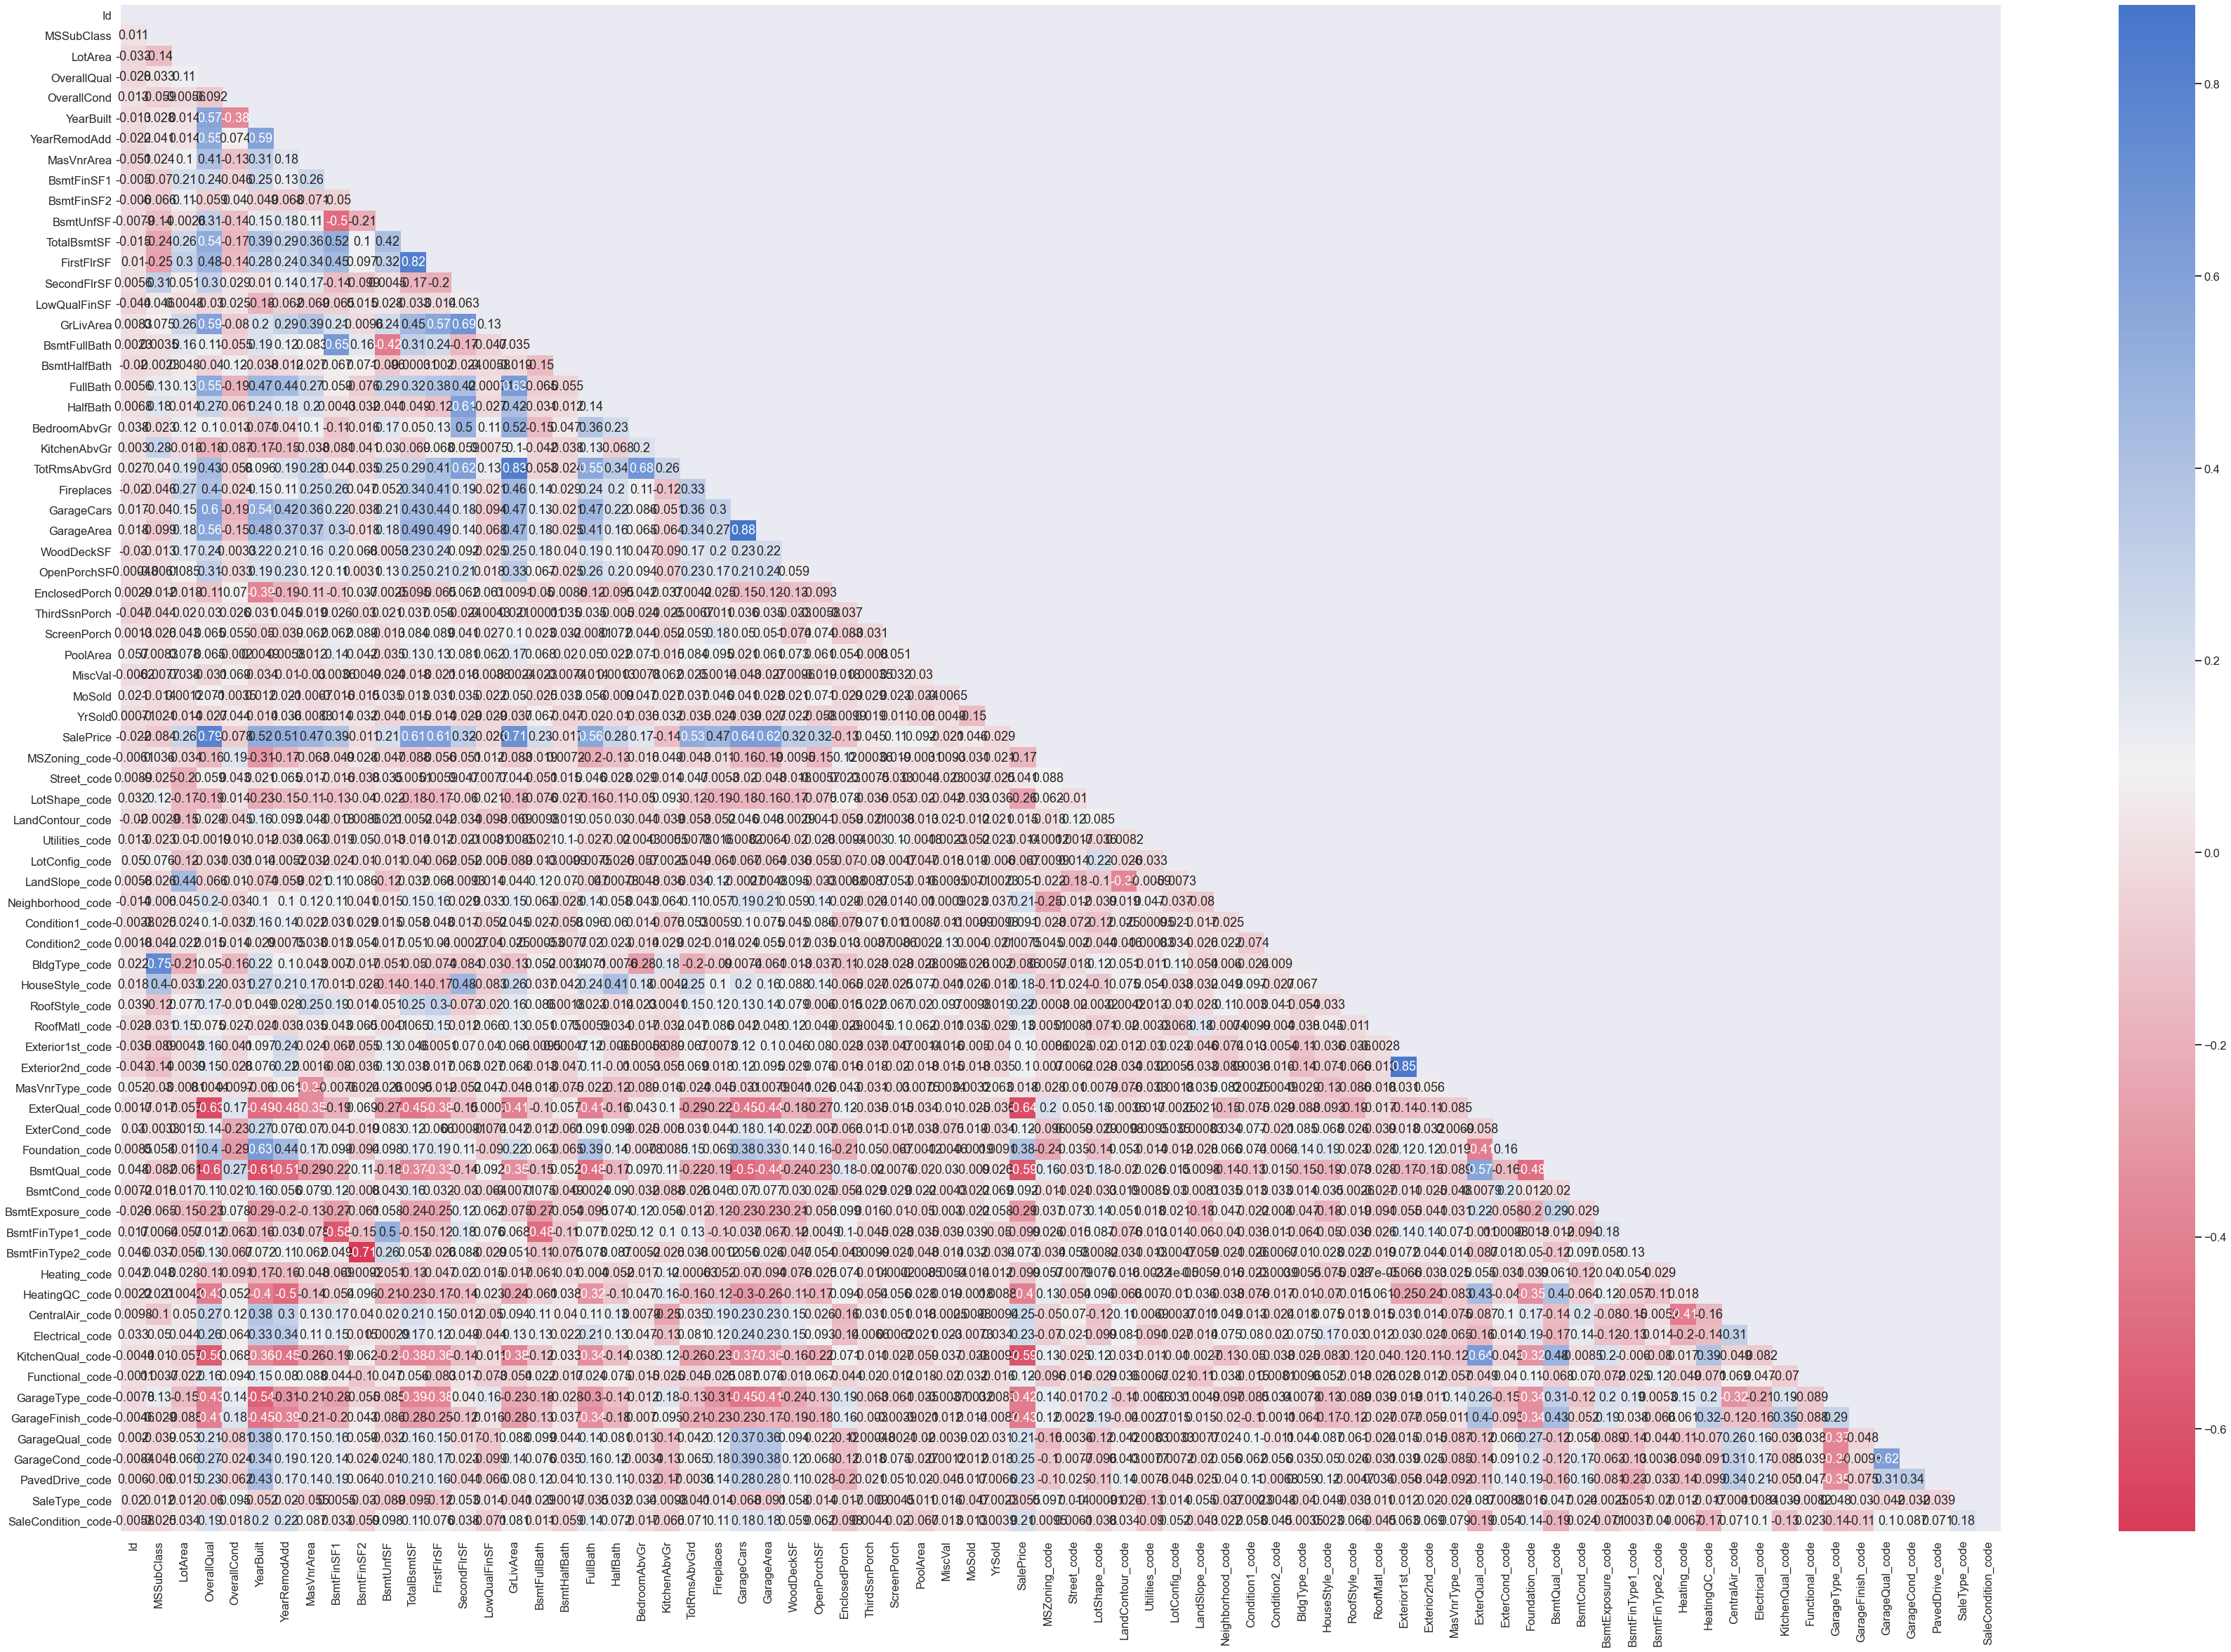

In [93]:
#Podemos crear un heatmap para revisar las correlaciones entre las variables.
data_corr = data.corr()

mask = np.zeros_like(data.corr(),dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (60,40))
cmap = sns.diverging_palette(6, 255,as_cmap = True)
sns.heatmap(data_corr, mask = mask, cmap = cmap, annot = True);

In [94]:
#Como son muchas variables, no se aprecia correctamente la gráfica, por lo que analizaremos la tabla
saleprice_corr = data_corr[35:36].transpose()
saleprice_corr.sort_values('SalePrice')

SalePrice
ExterQual_code      -0.636884
BsmtQual_code       -0.593734
KitchenQual_code    -0.589189
GarageFinish_code   -0.425684
GarageType_code     -0.415283
HeatingQC_code      -0.400178
BsmtExposure_code   -0.294589
LotShape_code       -0.255580
MSZoning_code       -0.166872
KitchenAbvGr        -0.135907
EnclosedPorch       -0.128578
Heating_code        -0.098812
BsmtFinType1_code   -0.098734
BldgType_code       -0.085591
MSSubClass          -0.084284
OverallCond         -0.077856
LotConfig_code      -0.067396
SaleType_code       -0.054911
YrSold              -0.028923
LowQualFinSF        -0.025606
Id                  -0.021917
MiscVal             -0.021190
BsmtHalfBath        -0.016844
Utilities_code      -0.014314
BsmtFinSF2          -0.011378
Condition2_code      0.007513
LandContour_code     0.015453
MasVnrType_code      0.018216
Street_code          0.041036
ThirdSsnPorch        0.044584
MoSold               0.046432
LandSlope_code       0.051152
BsmtFinType2_code    0.072717
Condition1_code      0.091155
BsmtCond_code        0.091503
PoolArea             0.092404
Exterior1st_code     0.103551
Exterior2nd_code     0.103766
ScreenPorch          0.111447
Functional_code      0.115328
ExterCond_code       0.117303
RoofMatl_code        0.132383
BedroomAbvGr         0.168213
HouseStyle_code      0.180163
GarageQual_code      0.205963
Neighborhood_code    0.210851
SaleCondition_code   0.213092
BsmtUnfSF            0.214479
RoofStyle_code       0.222405
BsmtFullBath         0.227122
PavedDrive_code      0.231357
Electrical_code      0.234410
GarageCond_code      0.246705
CentralAir_code      0.251328
LotArea              0.263843
HalfBath             0.284108
OpenPorchSF          0.315856
SecondFlrSF          0.319334
WoodDeckSF           0.324413
Foundation_code      0.382479
BsmtFinSF1           0.386420
Fireplaces           0.466929
MasVnrArea           0.472614
YearRemodAdd         0.507101
YearBuilt            0.522897
TotRmsAbvGrd         0.533723
FullBath             0.560664
FirstFlrSF           0.605852
TotalBsmtSF          0.613581
GarageArea           0.623431
GarageCars           0.640409
GrLivArea            0.708624
OverallQual          0.790982
SalePrice            1.000000

In [95]:
#Observamos que las variables numéricas con mayor relación (.60 o más) con el precio de las casas son:
#OverallQual, GrLivArea, GarageCars, ExterQual_code, GarageArea, TotalBsmtSF, 1stFlorSF

#Podríamos ver como se relacionan todas las demás variables entre sí.

In [96]:
#Modelo de regresión: 

#Definimos nuestras variables independientes
x = data[['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
          'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
          'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
          'MSZoning_code', 'Street_code', 'LotShape_code', 'LandContour_code', 'Utilities_code',
          'LotConfig_code', 'LandSlope_code', 'Neighborhood_code', 'Condition1_code',
          'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code',
          'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code',
          'BsmtFinType2_code', 'Heating_code', 'HeatingQC_code', 'CentralAir_code', 'Electrical_code', 
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'GarageFinish_code', 'GarageQual_code',
          'GarageCond_code', 'PavedDrive_code', 'SaleType_code', 'SaleCondition_code']]

#Definimos nuestra variable dependiente
y = data['SalePrice']

#Agregamos el intercepto para el modelo y lo corremos
X = sm.add_constant(x) 
Y = y

model = sm.OLS(Y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     110.2
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:02:00   Log-Likelihood:                -17172.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1389   BIC:                         3.486e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.907e+06   1.33e+06      1.439      0.150   -6.92e+05    4.51e+06
MSSubClass          -120.3786     45.330     -2.656      0.008    -209.301     -31.456
LotArea                0.3514      0.106      3.329      0.001       0.144       0.559
OverallQual         1.164e+04   1185.110      9.824      0.000    9317.280     1.4e+04
OverallCond         4662.8128   1039.481      4.486      0.000    2623.691    6701.934
YearBuilt            189.9926     74.415      2.553      0.011      44.014     335.971
YearRemodAdd          25.7523     66.512      0.387      0.699    -104.723     156.228
MasVnrArea            32.0790      6.096      5.262      0.000      20.121      44.037
BsmtFinSF1             4.0473      2.927      1.383      0.167      -1.695       9.789
BsmtFinSF2             6.1194      5.823      1.051      0.294      -5.304      17.543
BsmtUnfSF             -3.0563      2.963     -1.032      0.302      -8.868       2.756
TotalBsmtSF            7.1105      3.385      2.101      0.036       0.470      13.751
FirstFlrSF            18.8457      5.886      3.202      0.001       7.299      30.393
SecondFlrSF           19.3529      5.390      3.590      0.000       8.779      29.926
LowQualFinSF         -12.2375     13.818     -0.886      0.376     -39.344      14.869
GrLivArea             25.9611      5.408      4.800      0.000      15.352      36.570
BsmtFullBath        7297.2277   2454.929      2.972      0.003    2481.460    1.21e+04
BsmtHalfBath        2023.5321   3863.762      0.524      0.601   -5555.907    9602.971
FullBath            4040.8444   2678.618      1.509      0.132   -1213.730    9295.418
HalfBath             310.0593   2540.180      0.122      0.903   -4672.944    5293.062
BedroomAbvGr       -4109.9384   1666.649     -2.466      0.014   -7379.360    -840.517
KitchenAbvGr       -1.321e+04   4991.517     -2.647      0.008    -2.3e+04   -3422.067
TotRmsAbvGrd        3467.9144   1170.803      2.962      0.003    1171.182    5764.647
Fireplaces          4735.2315   1674.752      2.827      0.005    1449.915    8020.548
GarageCars          1.131e+04   2707.548      4.178      0.000    6000.589    1.66e+04
GarageArea            -3.5063      9.316     -0.376      0.707     -21.782      14.769
WoodDeckSF            19.4581      7.487      2.599      0.009       4.771      34.146
OpenPorchSF          -13.8476     14.278     -0.970      0.332     -41.856      14.160
EnclosedPorch          5.8579     15.644      0.374      0.708     -24.830      36.546
ThirdSsnPorch         26.1607     29.102      0.899      0.369     -30.928      83.249
ScreenPorch           48.9570     16.094      3.042      0.002      17.386      80.528
PoolArea             -25.0306     21.983     -1.139      0.255     -68.154      18.092
MiscVal               -0.5161      1.7

In [97]:
#Podemos sacar la ecuación de nuestro modelo, con el intercepto y los coeficientes de cada variable
#Vemos que el modelo tiene una R2 de 0.847, por lo que es un buen modelo prediciendo el precio de las casas.

#Vemos que hay muchas variables que no aportan mucho al modelo y otras que no son significativas para el precio de la casa

In [98]:
#Estandarizamos los datos: media  0 y varianza 1

features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
          'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
          'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
          'MSZoning_code', 'Street_code', 'LotShape_code', 'LandContour_code', 'Utilities_code',
          'LotConfig_code', 'LandSlope_code', 'Neighborhood_code', 'Condition1_code',
          'Condition2_code', 'BldgType_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'Exterior2nd_code', 'MasVnrType_code', 'ExterQual_code', 'ExterCond_code',
          'Foundation_code', 'BsmtQual_code', 'BsmtCond_code', 'BsmtExposure_code', 'BsmtFinType1_code',
          'BsmtFinType2_code', 'Heating_code', 'HeatingQC_code', 'CentralAir_code', 'Electrical_code', 
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'GarageFinish_code', 'GarageQual_code',
          'GarageCond_code', 'PavedDrive_code', 'SaleType_code', 'SaleCondition_code']

x = data.loc[:,features].values
types = data ['SalePrice']

#Aplicamos la estandarización de los datos

x = StandardScaler().fit_transform(x)

In [99]:
#Creamos el dataframe de los datos normalizados
data_norm = pd.DataFrame (x, columns = features)

data_norm.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    0.073375 -0.207142     0.651479    -0.517200   1.050994      0.878668   
1   -0.872563 -0.091886    -0.071836     2.179628   0.156734     -0.429577   
2    0.073375  0.073480     0.651479    -0.517200   0.984752      0.830215   
3    0.309859 -0.096897     0.651479    -0.517200  -1.863632     -0.720298   
4    0.073375  0.375148     1.374795    -0.517200   0.951632      0.733308   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  FirstFlrSF  \
0    0.514104    0.575425   -0.288653  -0.944591    -0.459303   -0.793434   
1   -0.570750    1.171992   -0.288653  -0.641228     0.466465    0.257140   
2    0.325915    0.092907   -0.288653  -0.301643    -0.313369   -0.627826   
3   -0.570750   -0.499274   -0.288653  -0.061670    -0.687324   -0.521734   
4    1.366489    0.463568   -0.288653  -0.174865     0.199680   -0.045611   

   SecondFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0     1.161852     -0.120242   0.370333      1.107810     -0.241061  0.789741   
1    -0.795163     -0.120242  -0.482512     -0.819964      3.948809  0.789741   
2     1.189351     -0.120242   0.515013      1.107810     -0.241061  0.789741   
3     0.937276     -0.120242   0.383659      1.107810     -0.241061 -1.026041   
4     1.617877     -0.120242   1.299326      1.107810     -0.241061  0.789741   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0  1.227585      0.163779     -0.211454      0.912210   -0.951226    0.311725   
1 -0.761621      0.163779     -0.211454     -0.318683    0.600495    0.311725   
2  1.227585      0.163779     -0.211454     -0.318683    0.600495    0.311725   
3 -0.761621      0.163779     -0.211454      0.296763    0.600495    1.650307   
4  1.227585      1.390023     -0.211454      1.527656    0.600495    1.650307   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ThirdSsnPorch  \
0    0.351000   -0.752176     0.216503      -0.359325      -0.116339   
1   -0.060731    1.626195    -0.704483      -0.359325      -0.116339   
2    0.631726   -0.752176    -0.070361      -0.359325      -0.116339   
3    0.790804   -0.752176    -0.176048       4.092524      -0.116339   
4    1.698485    0.780197     0.563760      -0.359325      -0.116339   

   ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSZoning_code  \
0    -0.270208 -0.068692 -0.087688 -1.599111  0.138777      -0.045532   
1    -0.270208 -0.068692 -0.087688 -0.489110 -0.614439      -0.045532   
2    -0.270208 -0.068692 -0.087688  0.990891  0.138777      -0.045532   
3    -0.270208 -0.068692 -0.087688 -1.599111 -1.367655      -0.045532   
4    -0.270208 -0.068692 -0.087688  2.100892  0.138777      -0.045532   

   Street_code  LotShape_code  LandContour_code  Utilities_code  \
0     0.064238       0.750731          0.314667        -0.02618   
1     0.064238       0.750731          0.314667        -0.02618   
2     0.064238      -1.378933          0.314667        -0.02618   
3     0.064238      -1.378933          0.314667        -0.02618   
4     0.064238      -1.378933          0.314667        -0.02618   

   LotConfig_code  LandSlope_code  Neighborhood_code  Condition1_code  \
0        0.604670       -0.225716          -1.206215        -0.036289   
1       -0.628316       -0.225716           1.954302        -1.188074   
2        0.604670       -0.225716          -1.206215        -0.036289   
3       -1.861302       -0.225716          -1.039872        -0.036289   
4       -0.628316       -0.225716           0.457215        -0.036289   

   Condition2_code  BldgType_code  HouseStyle_code  RoofStyle_code  \
0         -0.03174      -0.411691         1.026689       -0.491516   
1         -0.03174      -0.411691        -0.543457       -0.491516   
2         -0.03174      -0.411691         1.026689       -0.491516   
3         -0.03174      -0.411691         1.026689       -0.491516   
4         -0.03174      -0.411691

In [100]:
#Hacemos el PCA

pca = PCA()
pca.fit(data_norm)

PCA()

In [101]:
#Revisamos los componentes que nos arroja el PCA, para ver cuantos componentes necesitamos para explicar el 80% de la varianza
pca.explained_variance_ratio_

array([1.37349899e-01, 5.62326329e-02, 4.62821468e-02, 4.03229923e-02,
       3.33209115e-02, 2.99101254e-02, 2.50364018e-02, 2.35283744e-02,
       2.15571642e-02, 2.09236816e-02, 2.01255406e-02, 1.92575775e-02,
       1.87443058e-02, 1.82347380e-02, 1.73562303e-02, 1.67456605e-02,
       1.62319687e-02, 1.59108365e-02, 1.53747813e-02, 1.52824017e-02,
       1.51104582e-02, 1.43646007e-02, 1.42118954e-02, 1.37792835e-02,
       1.36090057e-02, 1.32051023e-02, 1.30415773e-02, 1.23926244e-02,
       1.20716140e-02, 1.19220307e-02, 1.18483854e-02, 1.14018000e-02,
       1.11060948e-02, 1.08352316e-02, 1.06710219e-02, 1.05304268e-02,
       1.03436145e-02, 9.81186467e-03, 9.27701950e-03, 9.05592347e-03,
       8.89375865e-03, 8.77222133e-03, 8.43841140e-03, 8.21886543e-03,
       8.06884279e-03, 7.75451333e-03, 7.57151282e-03, 7.51691684e-03,
       6.96727585e-03, 6.64729687e-03, 6.10095293e-03, 5.96633504e-03,
       5.59533293e-03, 5.53057410e-03, 5.41545780e-03, 5.36522752e-03,
      

In [102]:
#La suma de los componentes debe ser 1
sum(pca.explained_variance_ratio_)

1.0000000000000002

Text(0, 0.5, 'Varianza acumulada explicada')

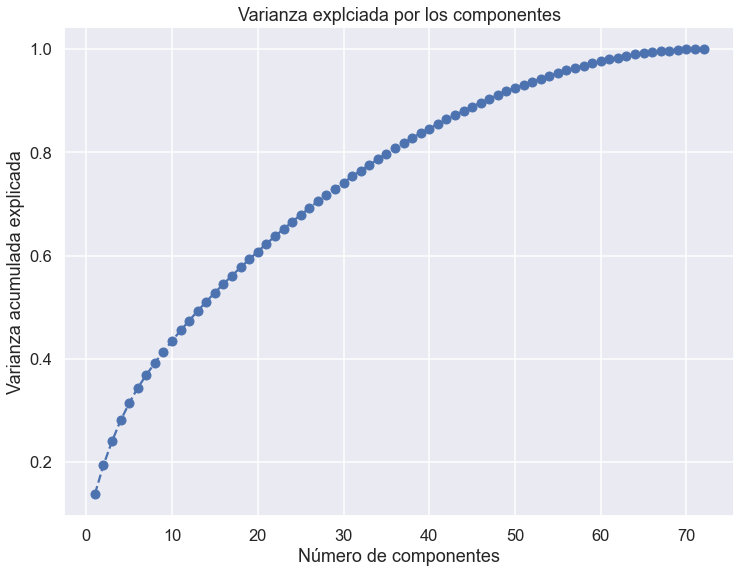

In [103]:
#Graficamos los componentes para ver cuando sumen el 80%
plt.figure (figsize = (12,9))
plt.plot(range(1,73), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title ("Varianza explciada por los componentes")
plt.xlabel ('Número de componentes')
plt.ylabel ('Varianza acumulada explicada')

In [104]:
#Vemos con cuantos componentes alcanzamos el 80% de la explicación de la varianza.
#Parece que con 34-35 componentes se alcanza

#Revisamos para comprobar
sum(pca.explained_variance_ratio_[:36])


0.8078295237818027

In [105]:
#Entrenamos el modelo con los 35 componentes que nos indicó previamente
pca = PCA(n_components = 35)
pca.fit(data_norm)

PCA(n_components=35)

In [106]:
#Transformamos el dataframe
data_transform = pca.transform(data_norm)

In [107]:
#Creamos un dataframe para ver nuevamente la información con los 35 componentes
data_pca = pd.DataFrame(data_transform, index = data_norm.index, columns = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8', 'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12', 'Componente 13', 'Componente 14', 'Componente 15', 'Componente 16', 'Componente 17', 'Componente 18', 'Componente 19', 'Componente 20', 'Componente 21', 'Componente 22', 'Componente 23', 'Componente 24', 'Componente 25', 'Componente 26', 'Componente 27', 'Componente 28', 'Componente 29', 'Componente 30', 'Componente 31', 'Componente 32', 'Componente 33', 'Componente 34', 'Componente 35'])
data_pca.head()

Componente 1  Componente 2  Componente 3  Componente 4  Componente 5  \
0      2.086023      0.487324     -1.635995      1.655355     -0.293744   
1      0.276982     -2.127500      0.998692      0.234877     -0.956021   
2      2.570060      0.193630     -1.286463      1.320509     -0.467576   
3     -1.542375      1.138183      1.616423      0.330737     -0.665967   
4      4.857378      1.147904      0.424487      1.609120     -0.434740   

   Componente 6  Componente 7  Componente 8  Componente 9  Componente 10  \
0      1.253647     -0.443093     -0.324321     -1.881612       0.776702   
1      0.097624     -1.105786     -0.188462      0.577631      -0.564822   
2      1.543545      0.026271      0.527291     -1.125431       0.312890   
3      1.351577      0.084570     -0.633294     -1.830586       1.142390   
4      1.112398      0.066028      0.390682     -1.436856       0.616915   

   Componente 11  Componente 12  Componente 13  Componente 14  Componente 15  \
0       0.353458      -0.254565       0.202688       1.122879       0.268087   
1      -0.260874       0.404848       0.149190      -2.541282       0.156889   
2       0.750192      -0.446079       0.399062       0.180076      -0.192079   
3       1.423042       2.098586      -0.727578      -1.812771      -0.633295   
4       0.659543      -0.145234       0.260110      -0.825368       0.196113   

   Componente 16  Componente 17  Componente 18  Componente 19  Componente 20  \
0       0.875532      -0.413492      -0.090661      -0.179696       0.035508   
1      -0.034437      -0.374846      -1.117830      -0.326145      -0.458966   
2      -0.334561      -0.015402       0.143828      -0.219895       0.794548   
3       1.017566       3.177274      -0.944493       0.016796       0.565805   
4      -1.155924       0.427135      -0.547474       0.398905       0.298755   

   Componente 21  Componente 22  Componente 23  Componente 24  Componente 25  \
0      -0.115490       1.126366      -0.163383      -0.603297       0.110893   
1       2.868118       1.256783      -0.584124       1.263746       1.175811   
2      -0.085666      -0.119541       0.067821      -0.474699      -0.811844   
3      -2.450457      -0.920787       0.555402       0.644270      -0.150056   
4       0.398225      -0.959519       0.428596      -0.330125      -0.375311   

   Componente 26  Componente 27  Componente 28  Componente 29  Componente 30  \
0       0.489733      -0.091695       1.181905       0.350993       0.785722   
1      -1.377404       0.973764      -0.973381       0.541704      -0.217138   
2       0.157713      -0.135498       0.224232       0.565450       0.272834   
3      -0.245560       0.800691       1.370929      -0.128740       1.538971   
4       0.351942      -0.100684      -0.276732       1.029216      -0.364258   

   Componente 31  Componente 32  Componente 33  Componente 34  Componente 35  
0       0.183379      -0.172946      -0.142854       0.723236       0.620163  
1      -0.539493      -1.131830       0.656744      -0.628199      -0.897108  
2      -0.052575       0.860311      -0.360313      -0.581888       0.628282  
3       0.195077      -1.378033      -0.494944      -0.870167       1.417648  
4       0.142348       1.530584      -0.329750      -0.587920      -0.028851

In [108]:
#Para revisar que atributos te explica cada uno de los componentes

data_pca_comp= pd.DataFrame (data = pca.components_, columns = data_norm.columns.values, index = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8', 'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12', 'Componente 13', 'Componente 14', 'Componente 15', 'Componente 16', 'Componente 17', 'Componente 18', 'Componente 19', 'Componente 20', 'Componente 21', 'Componente 22', 'Componente 23', 'Componente 24', 'Componente 25', 'Componente 26', 'Componente 27', 'Componente 28', 'Componente 29', 'Componente 30', 'Componente 31', 'Componente 32', 'Componente 33', 'Componente 34', 'Componente 35'])
data_pca_comp

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
Componente 1    -0.007579  0.070135     0.264122    -0.070903   0.240467   
Componente 2     0.103556 -0.030523     0.060625    -0.007314  -0.124464   
Componente 3    -0.165448  0.278575    -0.026592     0.093002  -0.224060   
Componente 4     0.315788 -0.036351    -0.038554     0.044530   0.053115   
Componente 5     0.317541  0.018000     0.010666    -0.164626  -0.006152   
Componente 6    -0.052117  0.114109     0.012998     0.219203  -0.043970   
Componente 7     0.040950  0.174601    -0.086634    -0.273895   0.093478   
Componente 8    -0.007873  0.246659    -0.032866    -0.114282   0.030560   
Componente 9    -0.039398  0.025986     0.077090     0.192895   0.018566   
Componente 10   -0.287259 -0.009057    -0.052190    -0.154685   0.035804   
Componente 11   -0.046294 -0.076221     0.016490    -0.174755   0.053018   
Componente 12    0.176704 -0.030713     0.098456     0.163451  -0.130784   
Componente 13   -0.051835  0.019303     0.024491     0.115577  -0.045395   
Componente 14   -0.012902 -0.002253     0.042553    -0.127379  -0.005567   
Componente 15   -0.006484  0.127119    -0.067651     0.059404   0.059027   
Componente 16    0.024481 -0.010234    -0.023490     0.019152  -0.025403   
Componente 17    0.067588  0.022290     0.059491    -0.015318  -0.028653   
Componente 18    0.044261  0.021548    -0.056213    -0.056927   0.044880   
Componente 19    0.108048  0.073720     0.024898     0.246910  -0.082136   
Componente 20    0.007228 -0.068067     0.032973     0.060600  -0.010244   
Componente 21   -0.054736  0.059297    -0.017745     0.079797   0.016357   
Componente 22   -0.029697  0.094451    -0.009724     0.001131   0.038266   
Componente 23    0.057330 -0.021207     0.008590    -0.054672  -0.016603   
Componente 24    0.045488 -0.081036     0.006451    -0.004214   0.002180   
Componente 25   -0.039269 -0.015175    -0.048916     0.000708  -0.011501   
Componente 26   -0.065467 -0.188864    -0.008537     0.057215   0.031255   
Componente 27    0.081920  0.139603    -0.041022    -0.046854  -0.007546   
Componente 28   -0.068205  0.027039    -0.063268    -0.119599   0.042137   
Componente 29   -0.046830  0.022188    -0.002982    -0.030653   0.018353   
Componente 30   -0.011599  0.014528     0.043466     0.056565  -0.014455   
Componente 31    0.027948  0.173852     0.023732     0.015118  -0.023145   
Componente 32   -0.050776 -0.102335    -0.034294    -0.020722   0.002257   
Componente 33   -0.037038  0.117384     0.007069     0.125458   0.012261   
Componente 34   -0.015075  0.096642    -0.015624     0.139155   0.022755   
Componente 35   -0.033484  0.094381     0.006751     0.010579   0.037713   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Componente 1       0.203251    0.157178    0.123759   -0.014267   0.083910   
Componente 2      -0.001323    0.017178   -0.260295   -0.120004   0.209206   
Componente 3      -0.182413    0.067685    0.191344    0.171895  -0.081380   
Componente 4      -0.034443    0.054819    0.067178    0.068185  -0.308513   
Componente 5       0.006615    0.018088    0.191150   -0.016334  -0.153011   
Componente 6       0.174030   -0.137146    0.049858    0.059889  -0.226832   
Componente 7      -0.069736   -0.131938   -0.239595    0.336088   0.033743   
Componente 8      -0.113689    0.048037    0.033541   -0.417078   0.087252   
Componente 9       0.119493   -0.117769   -0.225134    0.191368   0.150183   
Componente 10     -0.060720   -0.084435    0.119166   -0.055203  -0.197771   
Componente 11     -0.102338    0.236479   -0.002343    0.050250  -0.003513   
Componente 12     -0.006095    0.033107    0.035681   -0.035685  -0.060792   
Componente 13     -0.011895    0.231596   -0.063317    0.009259  -0.065360   
Componente 14     -0.085172    0.145757   -0.048070    0.199681   0.033392   
Componente 15      0.070334    0.160066   -0.043478    0.051425   0.028307   
Componente 16      0.051962   

In [109]:
#Para realizar un modelo más práctico, realizaremos un ANOVA, para revisar que variables son significativas en nuestro modelo

#Con el ols calculamos la suma de cuadrados. Ordinal Least Squares
#Como queremos sacar la relación de height (variable dependiente) y sun (variable independiente), las ponemos en ols
model_simp = ols('SalePrice ~ MSSubClass + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_code + Street_code + LotShape_code + LandContour_code + Utilities_code + LotConfig_code + LandSlope_code + Neighborhood_code + Condition1_code + Condition2_code + BldgType_code + HouseStyle_code + RoofStyle_code + RoofMatl_code + Exterior1st_code + Exterior2nd_code + MasVnrType_code + ExterQual_code + ExterCond_code + Foundation_code + BsmtQual_code + BsmtCond_code + BsmtExposure_code + BsmtFinType1_code + BsmtFinType2_code + Heating_code + HeatingQC_code + CentralAir_code + Electrical_code + KitchenQual_code + Functional_code + GarageType_code + GarageFinish_code + GarageQual_code + GarageCond_code + PavedDrive_code + SaleType_code + SaleCondition_code', data = data).fit()
#Se está "entrenando" el modelo, para decirle que datos va a usar cuando lo metamos en la ANOVA

#Con el .fit le estamos pidiendo al modelo que ajuste la línea que relaciona los datos que le ponemos al "ols" en mejor medida.

In [110]:
sm.stats.anova_lm(model_simp)

df        sum_sq       mean_sq            F  \
MSSubClass             1.0  6.541130e+10  6.541130e+10    64.660153   
LotArea                1.0  5.966856e+11  5.966856e+11   589.833550   
OverallQual            1.0  5.467491e+12  5.467491e+12  5404.704903   
OverallCond            1.0  1.060528e+09  1.060528e+09     1.048350   
YearBuilt              1.0  9.261872e+10  9.261872e+10    91.555138   
YearRemodAdd           1.0  2.957231e+10  2.957231e+10    29.232721   
MasVnrArea             1.0  2.175227e+11  2.175227e+11   215.024790   
BsmtFinSF1             1.0  1.669333e+11  1.669333e+11   165.016330   
BsmtFinSF2             1.0  8.697119e+09  8.697119e+09     8.597246   
BsmtUnfSF              1.0  6.149832e+10  6.149832e+10    60.792103   
TotalBsmtSF            1.0  8.253153e+09  8.253153e+09     8.158378   
FirstFlrSF             1.0  1.143795e+11  1.143795e+11   113.066021   
SecondFlrSF            1.0  4.821203e+11  4.821203e+11   476.583913   
LowQualFinSF           1.0  2.941817e+09  2.941817e+09     2.908035   
GrLivArea              1.0  2.199778e+09  2.199778e+09     2.174517   
BsmtFullBath           1.0  1.938811e+10  1.938811e+10    19.165468   
BsmtHalfBath           1.0  8.808509e+07  8.808509e+07     0.087074   
FullBath               1.0  6.637691e+08  6.637691e+08     0.656147   
HalfBath               1.0  2.156144e+07  2.156144e+07     0.021314   
BedroomAbvGr           1.0  4.333918e+10  4.333918e+10    42.841493   
KitchenAbvGr           1.0  3.146973e+09  3.146973e+09     3.110835   
TotRmsAbvGrd           1.0  2.792980e+10  2.792980e+10    27.609066   
Fireplaces             1.0  7.733281e+09  7.733281e+09     7.644476   
GarageCars             1.0  4.930751e+10  4.930751e+10    48.741289   
GarageArea             1.0  7.778404e+07  7.778404e+07     0.076891   
WoodDeckSF             1.0  9.632329e+09  9.632329e+09     9.521716   
OpenPorchSF            1.0  1.370906e+06  1.370906e+06     0.001355   
EnclosedPorch          1.0  8.669783e+07  8.669783e+07     0.085702   
ThirdSsnPorch          1.0  5.460266e+08  5.460266e+08     0.539756   
ScreenPorch            1.0  1.279020e+10  1.279020e+10    12.643319   
PoolArea               1.0  2.116882e+09  2.116882e+09     2.092573   
MiscVal                1.0  1.651572e+08  1.651572e+08     0.163261   
MoSold                 1.0  1.178538e+06  1.178538e+06     0.001165   
YrSold                 1.0  1.451158e+09  1.451158e+09     1.434494   
MSZoning_code          1.0  3.477323e+09  3.477323e+09     3.437391   
Street_code            1.0  1.880317e+09  1.880317e+09     1.858724   
LotShape_code          1.0  2.452206e+09  2.452206e+09     2.424046   
LandContour_code       1.0  6.265075e+08  6.265075e+08     0.619313   
Utilities_code         1.0  3.079315e+09  3.079315e+09     3.043954   
LotConfig_code         1.0  1.190115e+08  1.190115e+08     0.117645   
LandSlope_code         1.0  5.942741e+09  5.942741e+09     5.874497   
Neighborhood_code      1.0  1.001276e+10  1.001276e+10     9.897776   
Condition1_code        1.0  5.970311e+08  5.970311e+08     0.590175   
Condition2_code        1.0  4.657970e+09  4.657970e+09     4.604480   
BldgType_code          1.0  1.551954e+09  1.551954e+09     1.534132   
HouseStyle_code        1.0  5.700016e+09  5.700016e+09     5.634560   
RoofStyle_code         1.0  5.247588e+09  5.247588e+09     5.187328   
RoofMatl_code          1.0  8.086365e+09  8.086365e+09     7.993505   
Exterior1st_code       1.0  4.200389e+09  4.200389e+09     4.152154   
Exterior2nd_code       1.0  9.387931e+08  9.387931e+08     0.928012   
MasVnrType_code        1.0  3.216254e+10  3.216254e+10    31.793201   
ExterQual_code         1.0  8.370845e+10  8.370845e+10    82.747182   
ExterCond_code         1.0  4.779358e+08  4.779358e+08     0.472447   
Foundation_code        1.0  2.388951e+09  2.388951e+09     2.361518   
BsmtQual_code          1.0  2.602048e+10  2.602048e+10    25.721673   
BsmtCond_code          1.0  2.276139e+09  2.2761

In [111]:
#Con este modelo vemos que variables son significativas en el precio de las casas
#Las variables que tengan un P-value menor a 0.05 afectan de manera significativa el precio de las casas

In [112]:
#Modelo de regresión 2: 

#Definimos nuestras variables independientes
x2 = data[['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars','WoodDeckSF', 'ScreenPorch', 'LandSlope_code', 'Neighborhood_code',
          'Condition2_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'MasVnrType_code', 'ExterQual_code', 'BsmtQual_code', 'BsmtExposure_code',
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'SaleCondition_code']]

#Definimos nuestra variable dependiente
y2 = data['SalePrice']

#Agregamos el intercepto para el modelo y lo corremos
X2 = sm.add_constant(x2) 
Y2 = y2

model2 = sm.OLS(Y2, X2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     224.4
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:02:01   Log-Likelihood:                -17213.
No. Observations:                1460   AIC:                         3.449e+04
Df Residuals:                    1426   BIC:                         3.467e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.692e+05   1.26e+05     -5.307      0.000   -9.17e+05   -4.22e+05
MSSubClass          -200.4218     23.605     -8.491      0.000    -246.726    -154.118
LotArea                0.3247      0.103      3.152      0.002       0.123       0.527
OverallQual         1.335e+04   1140.985     11.702      0.000    1.11e+04    1.56e+04
YearBuilt            153.6821     48.661      3.158      0.002      58.227     249.137
YearRemodAdd         199.8090     57.985      3.446      0.001      86.064     313.554
MasVnrArea            31.5724      6.055      5.214      0.000      19.695      43.450
BsmtFinSF1             7.4314      2.349      3.164      0.002       2.824      12.039
BsmtFinSF2             5.0446      4.190      1.204      0.229      -3.174      13.264
BsmtUnfSF             -4.1753      2.244     -1.861      0.063      -8.577       0.226
TotalBsmtSF            8.3007      3.124      2.657      0.008       2.172      14.430
FirstFlrSF            40.4266      5.385      7.508      0.000      29.864      50.989
SecondFlrSF           47.5280      3.954     12.020      0.000      39.771      55.285
BsmtFullBath        5789.7825   2293.327      2.525      0.012    1291.125    1.03e+04
BedroomAbvGr       -3564.0725   1617.951     -2.203      0.028   -6737.891    -390.254
TotRmsAbvGrd        2878.1694   1103.586      2.608      0.009     713.344    5042.995
Fireplaces          6052.5029   1637.558      3.696      0.000    2840.222    9264.784
GarageCars          9507.9023   1605.273      5.923      0.000    6358.953    1.27e+04
WoodDeckSF            22.8806      7.424      3.082      0.002       8.317      37.444
ScreenPorch           48.3900     15.853      3.052      0.002      17.293      79.487
LandSlope_code      2606.0805   3592.905      0.725      0.468   -4441.865    9654.026
Neighborhood_code    353.5545    149.515      2.365      0.018      60.261     646.848
Condition2_code    -8999.7832   3307.044     -2.721      0.007   -1.55e+04   -2512.590
HouseStyle_code    -1061.5047    600.796     -1.767      0.077   -2240.043     117.034
RoofStyle_code      2088.5741   1110.121      1.881      0.060     -89.071    4266.219
RoofMatl_code       5099.7023   1498.493      3.403      0.001    2160.215    8039.190
Exterior1st_code    -774.5762    283.477     -2.732      0.006   -1330.653    -218.500
MasVnrType_code     4129.3932   1585.146      2.605      0.009    1019.926    7238.861
ExterQual_code     -8595.3153   1909.486     -4.501      0.000   -1.23e+04   -4849.611
BsmtQual_code      -3681.2401    997.494     -3.690      0.000   -5637.954   -1724.526
BsmtExposure_code  -3022.6227    638.857     -4.731      0.000   -4275.824   -1769.422
KitchenQual_code   -9139.3220   1424.383     -6.416      0.000   -1.19e+04   -6345.211
Functional_code     4270.9531    926.8

In [113]:
#Podemos sacar la ecuación de nuestro modelo, con el intercepto y los coeficientes de cada variable
#Vemos que el modelo tiene una R2 de 0.839, por lo que es un buen modelo prediciendo el precio de las casas.

In [114]:
#Estandarizamos los datos: media  0 y varianza 1

features2 = ['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
          'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'BsmtFullBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
          'Fireplaces', 'GarageCars','WoodDeckSF', 'ScreenPorch', 'LandSlope_code', 'Neighborhood_code',
          'Condition2_code', 'HouseStyle_code', 'RoofStyle_code', 'RoofMatl_code', 
          'Exterior1st_code', 'MasVnrType_code', 'ExterQual_code', 'BsmtQual_code', 'BsmtExposure_code',
          'KitchenQual_code', 'Functional_code', 'GarageType_code', 'SaleCondition_code']

x2 = data.loc[:,features2].values
types = data ['SalePrice']

#Aplicamos la estandarización de los datos

x2 = StandardScaler().fit_transform(x2)

In [115]:
#Creamos el dataframe de los datos normalizados
data_norm2 = pd.DataFrame (x2, columns = features2)

data_norm2.head()

MSSubClass   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    0.073375 -0.207142     0.651479   1.050994      0.878668    0.514104   
1   -0.872563 -0.091886    -0.071836   0.156734     -0.429577   -0.570750   
2    0.073375  0.073480     0.651479   0.984752      0.830215    0.325915   
3    0.309859 -0.096897     0.651479  -1.863632     -0.720298   -0.570750   
4    0.073375  0.375148     1.374795   0.951632      0.733308    1.366489   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  FirstFlrSF  SecondFlrSF  \
0    0.575425   -0.288653  -0.944591    -0.459303   -0.793434     1.161852   
1    1.171992   -0.288653  -0.641228     0.466465    0.257140    -0.795163   
2    0.092907   -0.288653  -0.301643    -0.313369   -0.627826     1.189351   
3   -0.499274   -0.288653  -0.061670    -0.687324   -0.521734     0.937276   
4    0.463568   -0.288653  -0.174865     0.199680   -0.045611     1.617877   

   BsmtFullBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0      1.107810      0.163779      0.912210   -0.951226    0.311725   
1     -0.819964      0.163779     -0.318683    0.600495    0.311725   
2      1.107810      0.163779     -0.318683    0.600495    0.311725   
3      1.107810      0.163779      0.296763    0.600495    1.650307   
4      1.107810      1.390023      1.527656    0.600495    1.650307   

   WoodDeckSF  ScreenPorch  LandSlope_code  Neighborhood_code  \
0   -0.752176    -0.270208       -0.225716          -1.206215   
1    1.626195    -0.270208       -0.225716           1.954302   
2   -0.752176    -0.270208       -0.225716          -1.206215   
3   -0.752176    -0.270208       -0.225716          -1.039872   
4    0.780197    -0.270208       -0.225716           0.457215   

   Condition2_code  HouseStyle_code  RoofStyle_code  RoofMatl_code  \
0         -0.03174         1.026689       -0.491516      -0.125797   
1         -0.03174        -0.543457       -0.491516      -0.125797   
2         -0.03174         1.026689       -0.491516      -0.125797   
3         -0.03174         1.026689       -0.491516      -0.125797   
4         -0.03174         1.026689       -0.491516      -0.125797   

   Exterior1st_code  MasVnrType_code  ExterQual_code  BsmtQual_code  \
0          0.743092        -1.241449       -0.777976      -0.566939   
1         -0.508251         0.387047        0.663451      -0.566939   
2          0.743092        -1.241449       -0.777976      -0.566939   
3          1.055928         0.387047        0.663451       0.997770   
4          0.743092        -1.241449       -0.777976      -0.566939   

   BsmtExposure_code  KitchenQual_code  Functional_code  GarageType_code  \
0           0.678263         -0.409369         0.255978        -0.768736   
1          -1.235906          0.795629         0.255978        -0.768736   
2          -0.597850         -0.409369         0.255978        -0.768736   
3           0.678263         -0.409369         0.255978         1.301075   
4          -1.873963         -0.409369         0.255978        -0.768736   

   SaleCondition_code  
0            0.208502  
1            0.208502  
2            0.208502  
3           -3.426284  
4            0.208502

In [116]:
#Hacemos el PCA

pca2 = PCA()
pca2.fit(data_norm2)

PCA()

In [117]:
#Revisamos los componentes que nos arroja el PCA, para ver cuantos componentes necesitamos para explicar el 80% de la varianza
pca2.explained_variance_ratio_

array([1.94594173e-01, 8.53051922e-02, 6.81385298e-02, 6.44334370e-02,
       4.51461882e-02, 3.90310100e-02, 3.38947526e-02, 3.27948802e-02,
       3.14522117e-02, 3.03352274e-02, 2.98786035e-02, 2.94249513e-02,
       2.71413919e-02, 2.58225815e-02, 2.47945412e-02, 2.30198280e-02,
       2.18911708e-02, 2.14245544e-02, 2.01354720e-02, 1.82731585e-02,
       1.60932381e-02, 1.41140130e-02, 1.36833938e-02, 1.30974984e-02,
       1.24144736e-02, 1.20767934e-02, 1.03943756e-02, 9.70195586e-03,
       9.09055321e-03, 7.85835787e-03, 6.14296973e-03, 5.63779726e-03,
       2.76272541e-03, 3.83769338e-32])

In [118]:
#La suma de los componentes debe ser 1
sum(pca2.explained_variance_ratio_)

1.0

Text(0, 0.5, 'Varianza acumulada explicada')

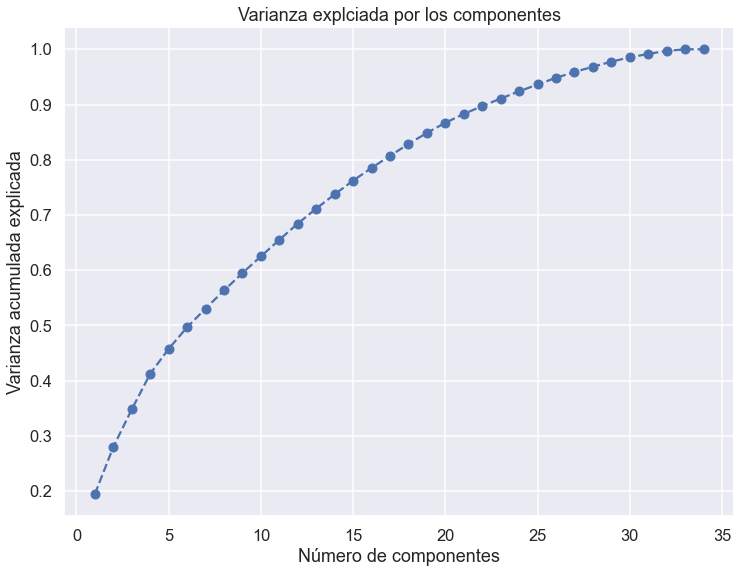

In [119]:
#Graficamos los componentes para ver cuando sumen el 80%
plt.figure (figsize = (12,9))
plt.plot(range(1,35), pca2.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title ("Varianza explciada por los componentes")
plt.xlabel ('Número de componentes')
plt.ylabel ('Varianza acumulada explicada')

In [120]:
#Vemos con cuantos componentes alcanzamos el 80% de la explicación de la varianza.
#Parece que con 17 componentes se alcanza

#Revisamos para comprobar
sum(pca2.explained_variance_ratio_[:17])


0.8070986698440021

In [121]:
#Entrenamos el modelo con los 17 componentes que nos indicó previamente
pca2 = PCA(n_components = 17)
pca2.fit(data_norm2)

PCA(n_components=17)

In [122]:
#Transformamos el dataframe
data_transform2 = pca2.transform(data_norm2)

In [123]:
#Creamos un dataframe para ver nuevamente la información con los 17 componentes
data_pca2 = pd.DataFrame(data_transform2, index = data_norm2.index, columns = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4', 'Componente 5', 'Componente 6', 'Componente 7', 'Componente 8', 'Componente 9', 'Componente 10', 'Componente 11', 'Componente 12', 'Componente 13', 'Componente 14', 'Componente 15', 'Componente 16', 'Componente 17'])
data_pca2.head()

Componente 1  Componente 2  Componente 3  Componente 4  Componente 5  \
0      1.171643     -1.333886     -0.848685     -1.840570     -0.715603   
1      0.572243      1.468153      0.011652     -0.024499     -0.242771   
2      1.447591     -0.925578     -0.908667     -1.668781     -0.180820   
3     -1.380782     -1.202584      1.065220     -0.855767      0.449825   
4      3.645644     -1.554852      0.725961     -1.947212     -0.392436   

   Componente 6  Componente 7  Componente 8  Componente 9  Componente 10  \
0      0.496675     -0.729027     -0.822432     -0.261677       1.195196   
1     -0.127276     -1.267345      0.889612     -0.461010      -1.336424   
2      1.170669     -0.311830     -0.629739     -0.434141       1.228364   
3     -0.588221      0.322903     -0.930629     -0.777025      -0.214465   
4      0.752623     -1.104254     -0.471467     -0.043250       0.146332   

   Componente 11  Componente 12  Componente 13  Componente 14  Componente 15  \
0      -0.611608       0.417826      -0.198829       0.302290       0.711115   
1       0.983771      -0.167158      -0.403541      -0.916413       0.085014   
2      -0.435488       0.111258       0.268607       0.410254       0.453994   
3      -1.448338       2.450741       0.308685       0.965236       1.171423   
4      -0.222258       0.569352       0.070607       0.224820      -0.113098   

   Componente 16  Componente 17  
0      -0.691283       1.121111  
1       0.356348      -1.312284  
2      -0.229606       0.737572  
3       0.439125      -0.521474  
4      -0.575170      -0.022752

In [124]:
#Nos quedamos con nuestro modelo final de 17 componentes, con sus respectivos coeficientes
pca2.explained_variance_ratio_[:17]

#Cada uno de los valores de las casas, va a estar dado por multiplicar el coeficiente de cada componente
#por el valor que tiene cada casa en ese componente

array([0.19459417, 0.08530519, 0.06813853, 0.06443344, 0.04514618,
       0.03903098, 0.0338947 , 0.03279455, 0.03145206, 0.03033442,
       0.02987833, 0.02942464, 0.02714052, 0.02582144, 0.0247747 ,
       0.02301311, 0.02189005])

In [125]:
## Elegiremos ahora las variables que observamos que tienen mayor relación en el análisis gráfico con el Precio de las casas
#Y que según el ANOVA realizado sean significativas.

#Para las variables de 'YearBuilt' y 'YearRemodAdd' - solamente tomaremos la de 'YearRemodAdd'
#Para las variables de 'OverallQual', 'ExterQual_code', 'BsmtQual_code', y 'KitchenQual_code' - solamente tomaremos la de 'OverallQual'

#Modelo de regresión 3: 

#Definimos nuestras variables independientes
x3 = data[['OverallQual', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'FirstFlrSF', 'TotRmsAbvGrd', 'GarageCars']]

#Definimos nuestra variable dependiente
y3 = data['SalePrice']

#Agregamos el intercepto para el modelo y lo corremos
X3 = sm.add_constant(x3) 
Y3 = y3

model3 = sm.OLS(Y3, X3).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     643.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:02:01   Log-Likelihood:                -17513.
No. Observations:                1460   AIC:                         3.504e+04
Df Residuals:                    1452   BIC:                         3.509e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.136e+05   1.18e+05     -7.761      0.000   -1.14e+06   -6.83e+05
OverallQual   2.352e+04   1152.898     20.399      0.000    2.13e+04    2.58e+04
YearRemodAdd   409.4142     60.691      6.746      0.000     290.363     528.466
MasVnrArea      45.5075      6.452      7.053      0.000      32.851      58.164
TotalBsmtSF     19.8295      4.386      4.521      0.000      11.226      28.433
FirstFlrSF      25.6129      4.939      5.186      0.000      15.924      35.302
TotRmsAbvGrd  8495.8985    747.414     11.367      0.000    7029.773    9962.024
GarageCars    1.562e+04   1808.550      8.637      0.000    1.21e+04    1.92e+04
==============================================================================
Omnibus:                      468.876   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21949.148
Skew:                           0.724   Prob(JB):                         0.00
Kurtosis:                      21.940   Cond. No.                     2.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
#Podemos sacar la ecuación de nuestro modelo, con el intercepto y los coeficientes de cada variable
#Vemos que el modelo tiene una R2 de 0.756, por lo que es un buen modelo prediciendo el precio de las casas.

In [127]:
#Estandarizamos los datos: media  0 y varianza 1

features3 = ['OverallQual', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'FirstFlrSF', 'TotRmsAbvGrd', 'GarageCars']

x3 = data.loc[:,features3].values
types = data ['SalePrice']

#Aplicamos la estandarización de los datos

x3 = StandardScaler().fit_transform(x3)

In [128]:
#Creamos el dataframe de los datos normalizados
data_norm3 = pd.DataFrame (x3, columns = features3)

data_norm3.head()

OverallQual  YearRemodAdd  MasVnrArea  TotalBsmtSF  FirstFlrSF  \
0     0.651479      0.878668    0.514104    -0.459303   -0.793434   
1    -0.071836     -0.429577   -0.570750     0.466465    0.257140   
2     0.651479      0.830215    0.325915    -0.313369   -0.627826   
3     0.651479     -0.720298   -0.570750    -0.687324   -0.521734   
4     1.374795      0.733308    1.366489     0.199680   -0.045611   

   TotRmsAbvGrd  GarageCars  
0      0.912210    0.311725  
1     -0.318683    0.311725  
2     -0.318683    0.311725  
3      0.296763    1.650307  
4      1.527656    1.650307

In [129]:
#Hacemos el PCA

pca3 = PCA()
pca3.fit(data_norm3)

PCA()

In [130]:
#Revisamos los componentes que nos arroja el PCA, para ver cuantos componentes necesitamos para explicar el 80% de la varianza
pca3.explained_variance_ratio_

array([0.49575422, 0.14172299, 0.11591219, 0.10421158, 0.07190209,
       0.04803847, 0.02245846])

In [131]:
#La suma de los componentes debe ser 1
sum(pca3.explained_variance_ratio_)

0.9999999999999998

Text(0, 0.5, 'Varianza acumulada explicada')

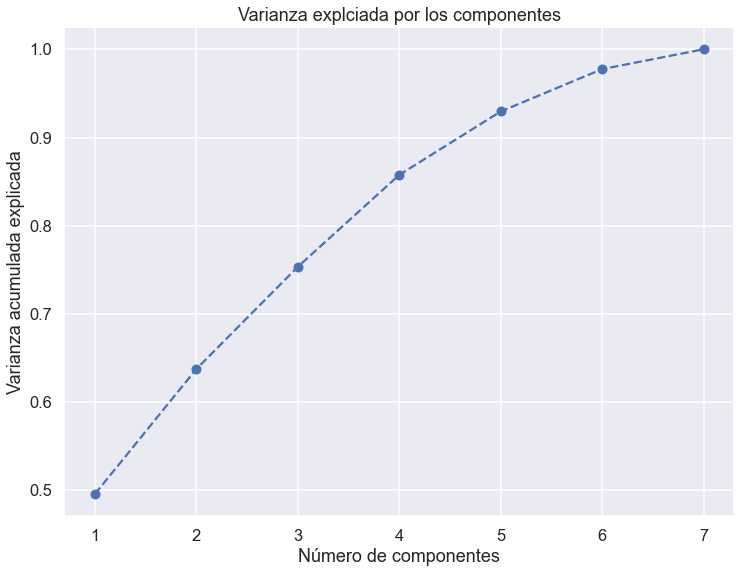

In [132]:
#Graficamos los componentes para ver cuando sumen el 80%
plt.figure (figsize = (12,9))
plt.plot(range(1,8), pca3.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title ("Varianza explciada por los componentes")
plt.xlabel ('Número de componentes')
plt.ylabel ('Varianza acumulada explicada')

In [133]:
#Vemos con cuantos componentes alcanzamos el 80% de la explicación de la varianza.
#Parece que con 4 componentes se alcanza

#Revisamos para comprobar
sum(pca3.explained_variance_ratio_[:4])


0.8576009813317303

In [134]:
#Entrenamos el modelo con los 4 componentes que nos indicó previamente
pca3 = PCA(n_components = 4)
pca3.fit(data_norm3)

PCA(n_components=4)

In [135]:
#Transformamos el dataframe
data_transform3 = pca3.transform(data_norm3)

In [136]:
#Creamos un dataframe para ver nuevamente la información con los 5 componentes
data_pca3 = pd.DataFrame(data_transform3, index = data_norm3.index, columns = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4'])
data_pca3.head()

Componente 1  Componente 2  Componente 3  Componente 4
0      0.596455     -1.260715      1.021084     -0.157912
1     -0.007702      0.432026     -0.618673     -0.197367
2      0.270116     -1.224877      0.080781      0.517131
3      0.136041     -0.679199      0.651204     -0.537150
4      2.458987     -0.928025      1.505276      0.040319

In [137]:
#Nos quedamos con nuestro modelo final de 4 componentes, con sus respectivos coeficientes
pca3.explained_variance_ratio_[:4]

#Cada uno de los valores de las casas, va a estar dado por multiplicar el coeficiente de cada componente
#por el valor que tiene cada casa en ese componente

array([0.49575422, 0.14172299, 0.11591219, 0.10421158])